# **IMPORT PACKAGE**

In [1]:
import pandas as pd
import datetime
import os

# **DATA DEFINITION**

Pada bagian ini, dipetakan keyword yang akan digunakan untuk proses scrapping (per lapangan usaha), berikut juga dengan batasan waktu dari artikel yang ingin diambil. Di Badan Pusat Statistik, terdapat 17 sektor lapangan usaha, meliputi:
1.	Pertanian, Kehutanan, dan Perikanan
2.	Pertambangan dan Penggalian
3.	Industri Pengolahan
4.	Pengadaan Listrik, Gas
5.	Pengadaan Air, Pengelolaan Sampah, Limbah dan Daur Ulang
6.	Konstruksi
7.	Perdagangan Besar dan Eceran, Reparasi Mobil dan Sepeda Motor
8.	Transportasi dan Pergudangan
9.	Penyediaan Akomodasi dan Makan Minum
10.	Informasi dan Komunikasi
11.	Jasa Keuangan dan Asuransi	
12.	Real Estat	
13.	Jasa Perusahaan
14.	Administrasi Pemerintahan, Pertahanan dan Jaminan Sosial Wajib
15.	Jasa Pendidikan
16.	Jasa Kesehatan dan Kegiatan Sosial
17.	Jasa lainnya

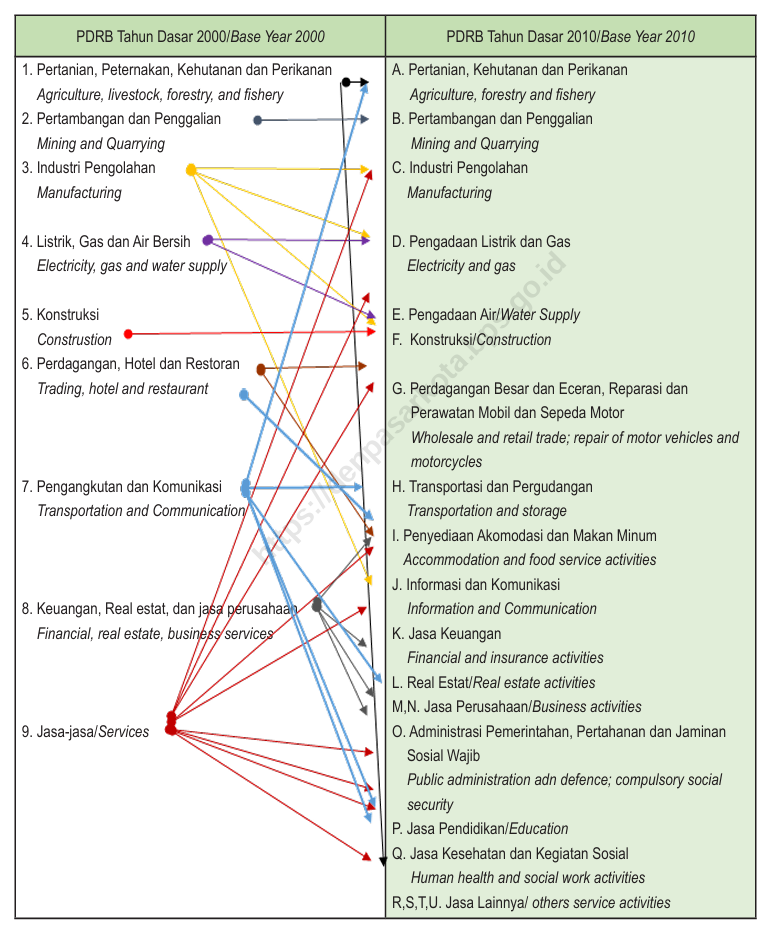

In [2]:
# Tentukan keywords dari masing-masing lapangan usaha
key_sektor = ['listrik','gas','pln']

keywords_scrap = key_sektor

# Tentukan rentang tanggal
start_date = datetime.date(2024, 10, 1)
end_date = datetime.date(2024, 11, 12)

# **SCRAPPING, PRE-CLEANING, & EXPORT (Scrapping BaliPost Lama)**

## 1. BaliPost

Fungsi dan package untuk scrapping di balipost ada pada kode di chunk berikut \
Aktifkan kalau pencarian di balipost sudah berjalan normal (saat kode ini dibuat sangat lambat)

In [3]:
# import requests
# from bs4 import BeautifulSoup
# import datetime
# import pandas as pd

# # Fungsi untuk melakukan scraping dari BaliPost
# def scrape_balipost(keyword, start_date, end_date, max_results, max_pages):
#     """
#     Fungsi untuk melakukan scraping artikel dari situs BaliPost berdasarkan keyword dan rentang tanggal.

#     Args:
#     - keyword (str): Keyword pencarian.
#     - start_date (datetime.date): Tanggal awal.
#     - end_date (datetime.date): Tanggal akhir.
#     - max_results (int): Maksimum jumlah artikel yang diambil.
#     - max_pages (int): Maksimum jumlah halaman yang diambil.

#     Returns:
#     - results (list): Daftar artikel yang berisi judul, link, tanggal, keyword, dan isi.
#     """
#     results = []

#     # Mengganti spasi dengan tanda "+" untuk keyword yang lebih dari satu kata
#     search_keyword = keyword.replace(" ", "+")
#     base_url = f"https://www.balipost.com/search/{search_keyword}"
#     current_page = 1

#     while len(results) < max_results and current_page <= max_pages:
#         url = f"{base_url}/page/{current_page}" if current_page > 1 else base_url
#         print(f"Scraping halaman {current_page} dari URL: {url}")
#         response = requests.get(url)

#         if response.status_code != 200:
#             print(f"Error saat mengakses halaman {current_page}. Status code: {response.status_code}")
#             break

#         soup = BeautifulSoup(response.content, "html.parser")
#         articles = soup.find_all("div", class_="td_module_10 td_module_wrap td-animation-stack")

#         if not articles:
#             print(f"Tidak ada artikel di halaman {current_page}, berhenti scraping.")
#             break

#         for article in articles:
#             title_element = article.find("h3", class_="entry-title td-module-title")
#             if title_element:
#                 title = title_element.text.strip()
#                 link = article.find("a")["href"]

#                 date_element = article.find("time", class_="entry-date updated td-module-date")
#                 if date_element:
#                     date_str = date_element["datetime"][:10]
#                     date = datetime.datetime.strptime(date_str, "%Y-%m-%d").date()

#                     # Cek apakah tanggal artikel dalam rentang yang diinginkan
#                     if not (start_date <= date <= end_date):
#                         continue

#                 content_element = article.find("div", class_="td-excerpt")
#                 content = content_element.text.strip() if content_element else ""

#                 results.append({"title": title, "keyword": keyword, "source": "BaliPost", "link": link, "date": date, "content": content})
#                 if len(results) >= max_results:
#                     break

#         pagination = soup.find("a", class_="page", title=str(current_page + 1))
#         if pagination:
#             current_page += 1
#         else:
#             break

#     return results


Memulai proses scrapping berita

In [4]:
# # Step 4: Scraping untuk setiap keyword
# # Takes a LOOOOOOOOOOOONG time

# all_news = []

# for keyword in keywords_scrap:
#     print(f"\nMemulai scraping untuk keyword: {keyword}")
#     news = scrape_balipost(keyword, start_date, end_date, max_results=25, max_pages=3)

#     # Tampilkan jumlah artikel yang berhasil diekstrak untuk keyword ini
#     num_articles = len(news)
#     print(f"Jumlah artikel yang diekstrak untuk keyword '{keyword}': {num_articles}")

#     all_news.extend(news)

# # Step 5: Simpan hasil ke dalam file Excel
# berita_balipost = pd.DataFrame(all_news)
# berita_balipost

In [5]:
# Import melalui kode ini kalau sudah ada raw data scrapping BaliPost yang terpisah dari proses scrapping diatas (hanya untuk BaliPost)
berita_balipost = pd.read_excel("C:/Users/asus/OneDrive/BPS/Neraca/berita_sektor4_triwulan4_bali.xlsx")
berita_balipost

,Unnamed: 0,title,link,date,keyword,content
0,0,Formula Subsidi BBM-Listrik Tepat Sasaran Ramp...,https://www.balipost.com/news/2024/11/04/42566...,2024-11-04,listrik,"JAKARTA, BALIPOST.com - Formulasi atau format ..."
1,1,"Tarif Listrik Triwulan IV Tidak Naik, PLN Jaga...",https://www.balipost.com/news/2024/10/03/42047...,2024-10-03,listrik,"JAKARTA, BALIPOST.com - Pemerintah melalui Kem..."
2,2,"Debat Terakhir Pilkada Karangasem, Ini Program...",https://www.balipost.com/news/2024/11/10/42666...,2024-11-10,gas,"DENPASAR, BALIPOST.com - Tiga pasangan calon (..."
3,3,"Jelang Pilkada Serentak, KPU Bali Tekankan Mit...",https://www.balipost.com/news/2024/11/10/42657...,2024-11-10,gas,"TABANAN, BALIPOST.com - KPU Bali menggelar cof..."
4,4,"Meriahkan HUT ke-53 Korpri, Pemkab Karangasem ...",https://www.balipost.com/news/2024/11/09/42649...,2024-11-09,gas,"AMLAPURA, BALIPOST.com - Dalam rangka memeriah..."
5,5,8.211 Petugas KPPS Disiagakan untuk Pilkada di...,https://www.balipost.com/news/2024/11/08/42631...,2024-11-08,gas,"SINGARAJA, BALIPOST.com - Komisi Pemilihan Umu..."
6,6,Puluhan Sumur untuk Irigasi di Jembrana Rusak,https://www.balipost.com/news/2024/11/08/42630...,2024-11-08,gas,"NEGARA, BALIPOST.com - Puluhan sumur bor untuk..."
7,7,Pilkada Bali Libatkan 47.565 KPPS dan 13.590 P...,https://www.balipost.com/news/2024/11/08/42629...,2024-11-08,gas,"DENPASAR, BALIPOST.com - Pilkada Serentak yang..."
8,8,"Debat Kedua, 3 Paslon Pilkada Bangli Adu Gagas...",https://www.balipost.com/news/2024/11/06/42597...,2024-11-06,gas,"DENPASAR, BALIPOST.com - Tiga calon wakil bupa..."
9,9,"Ditanya Soal Mitigasi Erupsi Gunung Agung, Ini...",https://www.balipost.com/news/2024/11/04/42559...,2024-11-04,gas,"AMLAPURA, BALIPOST.com - Peristiwa kelam erups..."


Pre-cleaning \
Hasil Scrapping BaliPost harus difilter terlebih dahulu wilayah (dari isi konten) dan judulnya (kadang tidak sesuai dengan kata yang diinginkan) \
Contoh: Kata kunci --> Ikan || Judul ditemukan --> DicarIKAN, DijanjIKAN

In [6]:
# Keyword to filter out
keywords_filter = ["TABANAN","SINGARAJA","DENPASAR","MANGUPURA","AMLAPURA","SEMARAPURA","NEGARA","GIANYAR","BANGLI"]

# Build the condition for multiple keywords
pattern = '|'.join(keywords_filter)  # Create a pattern that matches any of the keywords

# Filter out rows where 'Description' contains the keyword
berita_balipost_2 = pd.DataFrame(berita_balipost[berita_balipost['content'].str.contains(pattern, case=False, na=False)])

# Show the filtered DataFrame
print(berita_balipost_2.shape)
berita_balipost_2

(25, 6)


,Unnamed: 0,title,link,date,keyword,content
2,2,"Debat Terakhir Pilkada Karangasem, Ini Program...",https://www.balipost.com/news/2024/11/10/42666...,2024-11-10,gas,"DENPASAR, BALIPOST.com - Tiga pasangan calon (..."
3,3,"Jelang Pilkada Serentak, KPU Bali Tekankan Mit...",https://www.balipost.com/news/2024/11/10/42657...,2024-11-10,gas,"TABANAN, BALIPOST.com - KPU Bali menggelar cof..."
4,4,"Meriahkan HUT ke-53 Korpri, Pemkab Karangasem ...",https://www.balipost.com/news/2024/11/09/42649...,2024-11-09,gas,"AMLAPURA, BALIPOST.com - Dalam rangka memeriah..."
5,5,8.211 Petugas KPPS Disiagakan untuk Pilkada di...,https://www.balipost.com/news/2024/11/08/42631...,2024-11-08,gas,"SINGARAJA, BALIPOST.com - Komisi Pemilihan Umu..."
6,6,Puluhan Sumur untuk Irigasi di Jembrana Rusak,https://www.balipost.com/news/2024/11/08/42630...,2024-11-08,gas,"NEGARA, BALIPOST.com - Puluhan sumur bor untuk..."
7,7,Pilkada Bali Libatkan 47.565 KPPS dan 13.590 P...,https://www.balipost.com/news/2024/11/08/42629...,2024-11-08,gas,"DENPASAR, BALIPOST.com - Pilkada Serentak yang..."
8,8,"Debat Kedua, 3 Paslon Pilkada Bangli Adu Gagas...",https://www.balipost.com/news/2024/11/06/42597...,2024-11-06,gas,"DENPASAR, BALIPOST.com - Tiga calon wakil bupa..."
9,9,"Ditanya Soal Mitigasi Erupsi Gunung Agung, Ini...",https://www.balipost.com/news/2024/11/04/42559...,2024-11-04,gas,"AMLAPURA, BALIPOST.com - Peristiwa kelam erups..."
10,10,"Debat Kedua Pilkada Karangasem, GP Tawarkan Pr...",https://www.balipost.com/news/2024/11/04/42555...,2024-11-04,gas,"AMLAPURA, BALIPOST.com - Debat kedua untuk pas..."
11,11,"Debat Kedua, Ini Solusi 3 Paslon Pilkada Karan...",https://www.balipost.com/news/2024/11/03/42552...,2024-11-03,gas,"MANGUPURA, BALIPOST.com - Debat kedua bagi pas..."


In [7]:
# Build the regular expression pattern with word boundaries
pattern_1 = r'\b(' + '|'.join(keywords_scrap) + r')\b'  # Ensures "Ikan" is a whole word

# Filter rows where 'Title' contains the keyword as a whole word (case insensitive)
berita_balipost_3 = berita_balipost_2[berita_balipost_2['title'].str.contains(pattern_1, case=False, na=False)]

# Show the filtered DataFrame
print(berita_balipost_3.shape)
berita_balipost_3

(1, 6)


C:\Users\asus\AppData\Local\Temp\ipykernel_33372\1069968203.py:5: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  berita_balipost_3 = berita_balipost_2[berita_balipost_2['title'].str.contains(pattern_1, case=False, na=False)]


,Unnamed: 0,title,link,date,keyword,content
27,27,"Optimalkan Layanan Pelanggan di Bali, Pasukan ...",https://www.balipost.com/news/2024/10/05/42074...,2024-10-05,pln,"NEGARA, BALIPOST.com - Tim Pekerjaan Dalam Kea..."


In [8]:
# Remove Duplication
berita_balipost_3 = berita_balipost_3.drop_duplicates(subset='title', keep='first')
print(berita_balipost_3.shape)
berita_balipost_3

(1, 6)


,Unnamed: 0,title,link,date,keyword,content
27,27,"Optimalkan Layanan Pelanggan di Bali, Pasukan ...",https://www.balipost.com/news/2024/10/05/42074...,2024-10-05,pln,"NEGARA, BALIPOST.com - Tim Pekerjaan Dalam Kea..."


## 2. DetikBali

In [9]:
import math
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd

# Define web scraping functions
# Fungsi untuk menuju ke portal berita
def search_url(query, date_start, date_end, pages_num=1):
    url = f"https://www.detik.com/search/searchnews?query={query}&siteid=123&sortby=time&fromdatex={date_start}&todatex={date_end}&page={pages_num}&result_type=relevansi"
    
    print(url)
    response = requests.get(url)
    page = bs(response.content, "html.parser")

    return page

# Fungsi untuk menghitung jumlah artikel di halaman terakhir
def last_page_article_count(query, date_start, date_end, page_num):
    last_page = search_url(query, date_start, date_end, page_num)
    article_list = last_page.find("div", {"class": "list-content"})

    if article_list:
        articles = article_list.find_all('article', class_='list-content__item')           
    article_count = len(articles)
    
    return article_count

def news_search_results(query, date_start, date_end):
    page = search_url(query, date_start, date_end)
    
    pagination = page.find("div", {"class": "pagination"})
    if pagination:
        page_numbers = pagination.find_all('a', class_='pagination__item')
        if page_numbers:
            last_page_number = int(page_numbers[-2].text)

        # Menghitung jumlah artikel di halaman terakhir
        last_page_articles = last_page_article_count(query, date_start, date_end, last_page_number)

        # Menghitung jumlah artikel yang diperoleh
        num = (last_page_number - 1) * 10 + last_page_articles
    else:
        num = 0
        last_page_number = 1
    
    return num, last_page_number

# Fungsi untuk mendapatkan isi konten
def news_get_content(article_url):
    response = requests.get(article_url)
    content_page = bs(response.content, "html.parser")

    content_list = []
    multiple_page = content_page.find("div", {"class": "detail__multiple"})
    if multiple_page:
        multiple_page = [x.get("href") for x in multiple_page.find_all("a")][:-1]
        for page in multiple_page:
            response = requests.get(page)
            content_page = bs(response.content, "html.parser")
            content_list.extend([p.get_text() for p in content_page.find_all("p") if not p.get_text().startswith('\n\n\n\nHalaman\n\n') and
                                p.get_text() not in ['',
                                                    '[Gambas:Instagram]',
                                                    '[Gambas:Video 20detik]',
                                                    '\r\nADVERTISEMENT\r\n',
                                                    '\r\n    ADVERTISEMENT\r\n',
                                                    '\r\n    ADVERTISEMENT\r\n  ',
                                                    '\r\n   ADVERTISEMENT\r\n  ',
                                                    '\r\n   ADVERTISEMENT\r\n',
                                                    '\r\n        SCROLL TO RESUME CONTENT\r\n  ',
                                                    'Selengkapnya di halaman selanjutnya.',
                                                    '\n\t\t\t\t\tAyo share cerita pengalaman dan upload photo album travelingmu di sini.\n\n\t\t\t\t\t\t\t\t\t\t\tSilakan Daftar atau Masuk\n']])
    else:
        content_list.extend([p.get_text() for p in content_page.find_all("p")
                            if p.get_text() not in ['',
                                                    '[Gambas:Instagram]',
                                                    '[Gambas:Video 20detik]',
                                                    '\r\nADVERTISEMENT\r\n',
                                                    '\r\n    ADVERTISEMENT\r\n',
                                                    '\r\n    ADVERTISEMENT\r\n  ',
                                                    '\r\n   ADVERTISEMENT\r\n  ',
                                                    '\r\n   ADVERTISEMENT\r\n',
                                                    '\r\n        SCROLL TO RESUME CONTENT\r\n  ',
                                                    '\n\t\t\t\t\tAyo share cerita pengalaman dan upload photo album travelingmu di sini.\n\n\t\t\t\t\t\t\t\t\t\t\tSilakan Daftar atau Masuk\n']])

    content_list = '\n\n'.join(content_list)

    return content_list

# Fungsi untuk mengecek berita yang merupakan advertorial
def news_advertorial_check(article_url):
    response = requests.get(article_url)
    content_page = bs(response.content, "html.parser")

    author = content_page.find("meta", {"content": "Advertorial"})

    return bool(author)

# Fungsi untuk mencari artikel dengan output adalah jumlah artikel dan halaman terakhir
def search_articles(query, from_date, to_date, ads_article, article_content):
    results_num, last_page = news_search_results(query, from_date, to_date)
        
    print(f"Result num: {results_num}")
    print(f"Last page: {last_page}")

    return results_num, last_page

# Fungsi untuk memperoleh list artikel
def articles_list(query, from_date, to_date, ads_article, article_content, num_articles, last_page):
    article_lists = []
    pages = math.ceil(num_articles / 10)
    
    print("\nMemulai Scrapping dari DetikBali untuk keyword:", query)
    for i in range(1, pages + 1):
        print("Scrapping halaman", i, "dari URL: ")
        page = search_url(query, from_date, to_date, i)
        articles = page.find_all("article", class_="list-content__item")

        for article in articles:
            title = article.find("a", {"class": "media__link"}).get('dtr-ttl')
            category = article.find('h2', class_='media__subtitle').text.strip()
            publish_date = article.find('span', title=True).get('title')
            article_url = article.find("a", {"class": "media__link"}).get('href')
                
            # print(f"Title: {title}")
            # print(f"Category: {category}")
            # print(f"Publish Date: {publish_date}")
            # print(f"Article URL: {article_url}")

            if ads_article and news_advertorial_check(article_url):
                continue
            else:
                if article_content:
                    content = news_get_content(article_url)
                    if (
                        any(title in existing_article["title"] for existing_article in article_lists) or 
                        any(content in existing_article["content"] for existing_article in article_lists)
                    ):
                        continue
                    else:
                        article_lists.append({
                            "title": title,
                            "keyword": query,
                            "source": category,
                            "link": article_url,
                            "date": publish_date,
                            "content": content
                        })
                else:
                    if any(title in existing_article["title"] for existing_article in article_lists):
                        continue
                    else:
                        article_lists.append({
                            "title": title,
                            "keyword": query,
                            "link": article_url,
                            "date": publish_date
                        })
            if len(article_lists) == num_articles:
                break
        if len(article_lists) == num_articles:
            break
            
    print(f"Jumlah artikel dengan kata kunci {keyword}: {len(article_lists)} artikel.")
    data = article_lists
    return data

In [10]:
# Scraping untuk setiap keyword
all_news_detik = []

for keyword in keywords_scrap:
    search_keyword = keyword.replace(" ", "+")
    news = articles_list(search_keyword, start_date.strftime('%d/%m/%Y'), end_date.strftime('%d/%m/%Y'), False, True, 25, 5)
    all_news_detik.extend(news)

# Simpan hasil ke dalam file Excel
berita_detik = pd.DataFrame(all_news_detik) 
berita_detik


Memulai Scrapping dari DetikBali untuk keyword: listrik
Scrapping halaman 1 dari URL: 
https://www.detik.com/search/searchnews?query=listrik&siteid=123&sortby=time&fromdatex=01/10/2024&todatex=12/11/2024&page=1&result_type=relevansi
Scrapping halaman 2 dari URL: 
https://www.detik.com/search/searchnews?query=listrik&siteid=123&sortby=time&fromdatex=01/10/2024&todatex=12/11/2024&page=2&result_type=relevansi
Scrapping halaman 3 dari URL: 
https://www.detik.com/search/searchnews?query=listrik&siteid=123&sortby=time&fromdatex=01/10/2024&todatex=12/11/2024&page=3&result_type=relevansi
Jumlah artikel dengan kata kunci listrik: 25 artikel.

Memulai Scrapping dari DetikBali untuk keyword: gas
Scrapping halaman 1 dari URL: 
https://www.detik.com/search/searchnews?query=gas&siteid=123&sortby=time&fromdatex=01/10/2024&todatex=12/11/2024&page=1&result_type=relevansi
Scrapping halaman 2 dari URL: 
https://www.detik.com/search/searchnews?query=gas&siteid=123&sortby=time&fromdatex=01/10/2024&todatex

,title,keyword,source,link,date,content
0,Subsidi BBM dan Listrik Bocor Tembus Rp 100 Tr...,listrik,detikBali,https://www.detik.com/bali/bisnis/d-7620771/su...,"Senin, 04 Nov 2024 07:25 WIB",Menteri Energi dan Sumber Daya Mineral (ESDM) ...
1,Wiranto Sebut Prabowo Bagikan 500 Becak Listri...,listrik,detikBali,https://www.detik.com/bali/berita/d-7611883/wi...,"Selasa, 29 Okt 2024 12:59 WIB",Penasihat Khusus Presiden Bidang Politik dan K...
2,PLN Pastikan Pasokan Listrik Andal Saat Kunker...,listrik,detikBali,https://www.detik.com/bali/nusra/d-7569104/pln...,"Rabu, 02 Okt 2024 18:30 WIB",PT PLN (Persero) Unit Induk Wilayah (UIW) Nusa...
3,Geotermal Poco Leok Sumber Energi Listrik Terb...,listrik,detikBali,https://www.detik.com/bali/nusra/d-7576891/geo...,"Senin, 07 Okt 2024 20:42 WIB",Pelaksana Tugas (Plt) Asisten Perekonomian dan...
4,"Diduga Korsleting Listrik, Kantor DPPKB Dompu ...",listrik,detikBali,https://www.detik.com/bali/nusra/d-7580964/did...,"Kamis, 10 Okt 2024 10:56 WIB",Kantor Dinas Pengendalian Penduduk dan Keluarg...
...,...,...,...,...,...,...
57,Infrastruktur Kelistrikan di NTT Kini Diperkua...,pln,detikBali,https://www.detik.com/bali/bisnis/d-7580696/in...,"Kamis, 10 Okt 2024 08:12 WIB",PT PLN (Persero) Unit Induk Pembangunan Nusa T...
58,"Rekor Tertinggi, Beban Puncak Listrik di Bali ...",pln,detikBali,https://www.detik.com/bali/bisnis/d-7589839/re...,"Selasa, 15 Okt 2024 22:33 WIB",PT PLN (Persero) Unit Induk Distribusi (UID) B...
59,"Pohon Tumbang Timpa Mobil-Motor di Ubud, 2 Ora...",pln,detikBali,https://www.detik.com/bali/berita/d-7615127/po...,"Kamis, 31 Okt 2024 10:34 WIB",Hujan deras yang mengguyur sebagian wilayah Ba...
60,2.660 Orang Mengungsi Akibat Erupsi Gunung Lew...,pln,detikBali,https://www.detik.com/bali/nusra/d-7622407/2-6...,"Senin, 04 Nov 2024 22:16 WIB",Sebanyak 2.660 orang dilaporkan mengungsi akib...


Pre-cleaning

In [11]:
# Filter Wilayah
keywords_filter = ["Tabanan","Singaraja","Denpasar","Badung","Karangasem","Klungkung","Jembrana","Gianyar","Bangli"]

# Build the condition for multiple keywords
pattern = '|'.join(keywords_filter)  # Create a pattern that matches any of the keywords

# Filter out rows where 'Description' contains the keyword
berita_detik_2 = pd.DataFrame(berita_detik[berita_detik['content'].str.contains(pattern, case=False, na=False)])

# Show the filtered DataFrame
print(berita_detik_2.shape)
berita_detik_2

(20, 6)


,title,keyword,source,link,date,content
1,Wiranto Sebut Prabowo Bagikan 500 Becak Listri...,listrik,detikBali,https://www.detik.com/bali/berita/d-7611883/wi...,"Selasa, 29 Okt 2024 12:59 WIB",Penasihat Khusus Presiden Bidang Politik dan K...
5,Enam Bus Listrik Antar Jemput Bakal Diuji Coba...,listrik,detikBali,https://www.detik.com/bali/berita/d-7579764/en...,"Rabu, 09 Okt 2024 15:22 WIB",Enam bus antar jemput (shuttle bus) listrik ba...
7,Upaya Bali Menuju Swasembada Energi Setelah Be...,listrik,detikBali,https://www.detik.com/bali/berita/d-7634055/up...,"Selasa, 12 Nov 2024 08:29 WIB","Bendungan Sidan di Gianyar, Bali, segera rampu..."
8,"Progres Pembangunan Bendungan Sidan Capai 95%,...",listrik,detikBali,https://www.detik.com/bali/berita/d-7633507/pr...,"Senin, 11 Nov 2024 18:26 WIB",Progres pembangunan Bendungan Sidan di perbata...
9,Kebakaran Pasar Sri Bantas Akibat Korsleting L...,listrik,detikBali,https://www.detik.com/bali/berita/d-7625668/ke...,"Rabu, 06 Nov 2024 17:32 WIB",Kebakaran Pasar Tradisional Sri Bantas di Banj...
10,"Terdengar Dua Kali Ledakan, Rumah di Karangase...",listrik,detikBali,https://www.detik.com/bali/berita/d-7630530/te...,"Sabtu, 09 Nov 2024 19:29 WIB",Rumah milik warga bernama Marjuni (39) di Ling...
12,Warga Bongkasa Harap Kasus Fee Proyek Perbekel...,listrik,detikBali,https://www.detik.com/bali/hukum-dan-kriminal/...,"Kamis, 07 Nov 2024 22:58 WIB",Perbekel Bongkasa I Ketut Luki ditangkap polis...
13,"Nasib Proyek Pura Rp 2,4 Miliar Setelah Perbek...",listrik,detikBali,https://www.detik.com/bali/hukum-dan-kriminal/...,"Jumat, 08 Nov 2024 08:49 WIB",Perbekel Bongkasa I Ketut Luki ditangkap polis...
15,"Gudang Kayu di Karangasem Ludes Terbakar, Keru...",listrik,detikBali,https://www.detik.com/bali/berita/d-7616799/gu...,"Jumat, 01 Nov 2024 09:38 WIB",Sebuah gudang pengolahan kayu milik I Wayan Se...
17,Petugas Bongkar APK yang Dipasang Tak Sesuai K...,listrik,detikBali,https://www.detik.com/bali/pilkada/d-7623395/p...,"Selasa, 05 Nov 2024 15:03 WIB",Badan Pengawas Pemilihan Umum (Bawaslu) bersam...


In [12]:
# Build the regular expression pattern with word boundaries
pattern = r'\b(' + '|'.join(keywords_scrap) + r')\b'

# Filter rows where 'Title' contains the keyword as a whole word (case insensitive)
berita_detik_3 = berita_detik_2[berita_detik_2['title'].str.contains(pattern, case=False, na=False)]

# Show the filtered DataFrame
print(berita_detik_3.shape)
berita_detik_3

(4, 6)


C:\Users\asus\AppData\Local\Temp\ipykernel_33372\1307647291.py:5: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  berita_detik_3 = berita_detik_2[berita_detik_2['title'].str.contains(pattern, case=False, na=False)]


,title,keyword,source,link,date,content
1,Wiranto Sebut Prabowo Bagikan 500 Becak Listri...,listrik,detikBali,https://www.detik.com/bali/berita/d-7611883/wi...,"Selasa, 29 Okt 2024 12:59 WIB",Penasihat Khusus Presiden Bidang Politik dan K...
5,Enam Bus Listrik Antar Jemput Bakal Diuji Coba...,listrik,detikBali,https://www.detik.com/bali/berita/d-7579764/en...,"Rabu, 09 Okt 2024 15:22 WIB",Enam bus antar jemput (shuttle bus) listrik ba...
9,Kebakaran Pasar Sri Bantas Akibat Korsleting L...,listrik,detikBali,https://www.detik.com/bali/berita/d-7625668/ke...,"Rabu, 06 Nov 2024 17:32 WIB",Kebakaran Pasar Tradisional Sri Bantas di Banj...
27,Bangunan Semi Permanen di Denpasar Terbakar ge...,gas,detikBali,https://www.detik.com/bali/berita/d-7590557/ba...,"Rabu, 16 Okt 2024 14:11 WIB",Bangunan semi permanen seluas kurang lebih 2 a...


Menghapus berita yang duplikat

In [13]:
# Remove Duplication
berita_detik_4 = berita_detik_3.drop_duplicates(subset='title', keep='first')
print(berita_detik_4.shape)
berita_detik_4

(4, 6)


,title,keyword,source,link,date,content
1,Wiranto Sebut Prabowo Bagikan 500 Becak Listri...,listrik,detikBali,https://www.detik.com/bali/berita/d-7611883/wi...,"Selasa, 29 Okt 2024 12:59 WIB",Penasihat Khusus Presiden Bidang Politik dan K...
5,Enam Bus Listrik Antar Jemput Bakal Diuji Coba...,listrik,detikBali,https://www.detik.com/bali/berita/d-7579764/en...,"Rabu, 09 Okt 2024 15:22 WIB",Enam bus antar jemput (shuttle bus) listrik ba...
9,Kebakaran Pasar Sri Bantas Akibat Korsleting L...,listrik,detikBali,https://www.detik.com/bali/berita/d-7625668/ke...,"Rabu, 06 Nov 2024 17:32 WIB",Kebakaran Pasar Tradisional Sri Bantas di Banj...
27,Bangunan Semi Permanen di Denpasar Terbakar ge...,gas,detikBali,https://www.detik.com/bali/berita/d-7590557/ba...,"Rabu, 16 Okt 2024 14:11 WIB",Bangunan semi permanen seluas kurang lebih 2 a...


## 3. RadarBali

In [14]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager
from bs4 import BeautifulSoup
import time
from datetime import datetime

# Tanggal batas yang ingin dibandingkan
start_date = datetime(2024, 10, 1)  # 1 Oktober 2024
end_date = datetime(2024, 12, 31)  # 31 Desember 2024

# Inisialisasi driver Chrome tanpa mengunduh chromedriver secara manual
service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service)
# Fungsi untuk melakukan scraping dan mengambil isian kelas latest__subtitle, latest__link, dan latest__date
def get_news(query, start_page, end_page):
    results = []

    print("\nMemulai scrapping RadarBali untuk keyword:", query)
    for page in range(start_page, end_page + 1):
        url = f"https://radarbali.jawapos.com/search?q={query}&sort=latest&page={page}"
        print("Scrapping halaman",page,"dari URL:",url)
        driver.get(url)
        time.sleep(10)  # Tunggu beberapa detik agar halaman selesai dimuat

        # Ambil konten halaman dan buat objek BeautifulSoup
        soup = BeautifulSoup(driver.page_source, "html.parser")

        # Ambil semua elemen dengan class latest__item
        articles = soup.find_all('div', class_='latest__item')

        # Ambil informasi dari setiap artikel
        for article in articles:
            subtitle = article.find('h4', class_='latest__subtitle')
            title = article.find('a', class_='latest__link')
            link = article.find('a', class_='latest__link')['href']
            date = article.find('date', class_='latest__date')

            # Menampilkan hasil jika elemen ditemukan, filter tanggal sesuai yang diinginkan
            if subtitle and title and date:
                date_berita = date.get_text(strip=True)

                # Fungsi untuk mengonversi nama bulan menjadi angka bulan
                def get_month_number(month_name):
                    months = {
                        "Januari": 1,
                        "Februari": 2,
                        "Maret": 3,
                        "April": 4,
                        "Mei": 5,
                        "Juni": 6,
                        "Juli": 7,
                        "Agustus": 8,
                        "September": 9,
                        "Oktober": 10,
                        "November": 11,
                        "Desember": 12
                    }
                    return months.get(month_name)

                # Fungsi untuk mem-parsing tanggal dalam format yang diberikan
                def parse_date(date_str):
                    # Pisahkan hari dan waktu
                    day_part, time_part = date_str.split(" | ")

                    # Ambil tanggal dan bulan dari bagian day_part
                    day_name, day, month_name, year = day_part.split()
                    day = int(day)
                    year = int(year)
                    month = get_month_number(month_name)
                    
                    # Gabungkan menjadi format yang bisa diproses oleh datetime
                    # Format waktu seperti '21:46 WIB', jadi kita hanya perlu ambil jam dan menit
                    time = time_part.replace(" WIB", "")

                    # Gabungkan semuanya ke format yang sesuai dengan datetime
                    date_string = f"{year}-{month:02d}-{day:02d} {time}"

                    # Mengonversi ke objek datetime
                    return datetime.strptime(date_string, "%Y-%m-%d %H:%M")
            
                parsed_date = parse_date(date_berita)

                # Membandingkan apakah parsed_date berada dalam rentang 1 Oktober 2024 sampai 31 Desember 2024
                if start_date <= parsed_date <= end_date:
                    results.append({"title": title.get_text(strip=True), "keyword": query, "source": "RadarBali", "link": link, "date": date.get_text(strip=True), "content": subtitle.get_text(strip=True)})
                    # print("Subtitle:", subtitle.get_text(strip=True))
                    # print("Title:", title.get_text(strip=True))
                    # print("Link:", link)
                    # print("Date:", date.get_text(strip=True))
                    # print('-' * 80)
                else:
                    break

    return results

import pandas as pd

all_news_radarbali = []

for keyword in keywords_scrap:
    search_keyword = keyword.replace(" ", "+")
    news = get_news(search_keyword, start_page=1, end_page=5)

    # Tampilkan jumlah artikel yang berhasil diekstrak untuk keyword ini
    num_articles = len(news)
    print(f"Jumlah artikel yang diekstrak untuk keyword '{keyword}': {num_articles}")

    all_news_radarbali.extend(news)

driver.quit()


Memulai scrapping RadarBali untuk keyword: listrik
Scrapping halaman 1 dari URL: https://radarbali.jawapos.com/search?q=listrik&sort=latest&page=1
Scrapping halaman 2 dari URL: https://radarbali.jawapos.com/search?q=listrik&sort=latest&page=2
Scrapping halaman 3 dari URL: https://radarbali.jawapos.com/search?q=listrik&sort=latest&page=3
Scrapping halaman 4 dari URL: https://radarbali.jawapos.com/search?q=listrik&sort=latest&page=4
Scrapping halaman 5 dari URL: https://radarbali.jawapos.com/search?q=listrik&sort=latest&page=5
Jumlah artikel yang diekstrak untuk keyword 'listrik': 7

Memulai scrapping RadarBali untuk keyword: gas
Scrapping halaman 1 dari URL: https://radarbali.jawapos.com/search?q=gas&sort=latest&page=1
Scrapping halaman 2 dari URL: https://radarbali.jawapos.com/search?q=gas&sort=latest&page=2
Scrapping halaman 3 dari URL: https://radarbali.jawapos.com/search?q=gas&sort=latest&page=3
Scrapping halaman 4 dari URL: https://radarbali.jawapos.com/search?q=gas&sort=latest&pa

In [15]:
berita_radarbali = pd.DataFrame(all_news_radarbali)
berita_radarbali

,title,keyword,source,link,date,content
0,"Cuaca Panas hingga Korsleting Listrik, Damkar ...",listrik,RadarBali,https://radarbali.jawapos.com/denpasar/7053056...,"Selasa, 12 November 2024 | 20:23 WIB",Denpasar
1,Panik di Tengah Malam Token Listrik Mulai Buny...,listrik,RadarBali,https://radarbali.jawapos.com/ekonomi/70522252...,"Senin, 21 Oktober 2024 | 20:19 WIB",Ekonomi & Perbankan
2,Akhir Tahun Penjualan Mobil Listrik di Bali Me...,listrik,RadarBali,https://radarbali.jawapos.com/otomotif/7052163...,"Minggu, 20 Oktober 2024 | 11:50 WIB",Otomotif
3,"Kejelasan Hak Belum Tuntas, Puluhan Pekerja PL...",listrik,RadarBali,https://radarbali.jawapos.com/buleleng/7051973...,"Selasa, 15 Oktober 2024 | 10:25 WIB",Buleleng
4,"Punya Nilai Plus, di Jembrana PLTS Mulai Dilir...",listrik,RadarBali,https://radarbali.jawapos.com/jembrana/7051820...,"Kamis, 10 Oktober 2024 | 19:15 WIB",Jembrana
5,Enam Shuttle Bus Listrik Siap Uji Coba di Bula...,listrik,RadarBali,https://radarbali.jawapos.com/denpasar/7051790...,"Rabu, 9 Oktober 2024 | 20:07 WIB",Denpasar
6,"Maling Bobol Toko Elektronik di Karangasem, Ba...",listrik,RadarBali,https://radarbali.jawapos.com/hukum-kriminal/7...,"Rabu, 2 Oktober 2024 | 08:21 WIB",Hukum & Kriminal
7,"Baru Naturalisasi, Kevin Diks Langsung Gas Dit...",gas,RadarBali,https://radarbali.jawapos.com/sportmania/70530...,"Rabu, 13 November 2024 | 07:39 WIB",Sportmania
8,"Cegah Pengoplosan, Pemprov Bali Sidak LPG 3 K...",gas,RadarBali,https://radarbali.jawapos.com/bali/705257533/c...,"Kamis, 31 Oktober 2024 | 05:05 WIB",Bali
9,FAKTA PERSIDANGAN! Saksi Tegaskan Gudang Sukoj...,gas,RadarBali,https://radarbali.jawapos.com/hukum-kriminal/7...,"Kamis, 10 Oktober 2024 | 21:00 WIB",Hukum & Kriminal


In [16]:
# Remove Duplication
berita_radarbali_2 = berita_radarbali.drop_duplicates(subset='title', keep='first')
print(berita_radarbali_2.shape)
berita_radarbali_2

(10, 6)


,title,keyword,source,link,date,content
0,"Cuaca Panas hingga Korsleting Listrik, Damkar ...",listrik,RadarBali,https://radarbali.jawapos.com/denpasar/7053056...,"Selasa, 12 November 2024 | 20:23 WIB",Denpasar
1,Panik di Tengah Malam Token Listrik Mulai Buny...,listrik,RadarBali,https://radarbali.jawapos.com/ekonomi/70522252...,"Senin, 21 Oktober 2024 | 20:19 WIB",Ekonomi & Perbankan
2,Akhir Tahun Penjualan Mobil Listrik di Bali Me...,listrik,RadarBali,https://radarbali.jawapos.com/otomotif/7052163...,"Minggu, 20 Oktober 2024 | 11:50 WIB",Otomotif
3,"Kejelasan Hak Belum Tuntas, Puluhan Pekerja PL...",listrik,RadarBali,https://radarbali.jawapos.com/buleleng/7051973...,"Selasa, 15 Oktober 2024 | 10:25 WIB",Buleleng
4,"Punya Nilai Plus, di Jembrana PLTS Mulai Dilir...",listrik,RadarBali,https://radarbali.jawapos.com/jembrana/7051820...,"Kamis, 10 Oktober 2024 | 19:15 WIB",Jembrana
5,Enam Shuttle Bus Listrik Siap Uji Coba di Bula...,listrik,RadarBali,https://radarbali.jawapos.com/denpasar/7051790...,"Rabu, 9 Oktober 2024 | 20:07 WIB",Denpasar
6,"Maling Bobol Toko Elektronik di Karangasem, Ba...",listrik,RadarBali,https://radarbali.jawapos.com/hukum-kriminal/7...,"Rabu, 2 Oktober 2024 | 08:21 WIB",Hukum & Kriminal
7,"Baru Naturalisasi, Kevin Diks Langsung Gas Dit...",gas,RadarBali,https://radarbali.jawapos.com/sportmania/70530...,"Rabu, 13 November 2024 | 07:39 WIB",Sportmania
8,"Cegah Pengoplosan, Pemprov Bali Sidak LPG 3 K...",gas,RadarBali,https://radarbali.jawapos.com/bali/705257533/c...,"Kamis, 31 Oktober 2024 | 05:05 WIB",Bali
9,FAKTA PERSIDANGAN! Saksi Tegaskan Gudang Sukoj...,gas,RadarBali,https://radarbali.jawapos.com/hukum-kriminal/7...,"Kamis, 10 Oktober 2024 | 21:00 WIB",Hukum & Kriminal


In [17]:
# Build the regular expression pattern with word boundaries
pattern = r'\b(' + '|'.join(keywords_scrap) + r')\b'

# Filter rows where 'Title' contains the keyword as a whole word (case insensitive)
berita_radarbali_3 = berita_radarbali_2.copy()
berita_radarbali_3 = berita_radarbali_2[berita_radarbali_2['title'].str.contains(pattern, case=False, na=False)]

# Show the filtered DataFrame
print(berita_radarbali_3.shape)
berita_radarbali_3

(7, 6)


C:\Users\asus\AppData\Local\Temp\ipykernel_33372\2112746010.py:6: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  berita_radarbali_3 = berita_radarbali_2[berita_radarbali_2['title'].str.contains(pattern, case=False, na=False)]


,title,keyword,source,link,date,content
0,"Cuaca Panas hingga Korsleting Listrik, Damkar ...",listrik,RadarBali,https://radarbali.jawapos.com/denpasar/7053056...,"Selasa, 12 November 2024 | 20:23 WIB",Denpasar
1,Panik di Tengah Malam Token Listrik Mulai Buny...,listrik,RadarBali,https://radarbali.jawapos.com/ekonomi/70522252...,"Senin, 21 Oktober 2024 | 20:19 WIB",Ekonomi & Perbankan
2,Akhir Tahun Penjualan Mobil Listrik di Bali Me...,listrik,RadarBali,https://radarbali.jawapos.com/otomotif/7052163...,"Minggu, 20 Oktober 2024 | 11:50 WIB",Otomotif
5,Enam Shuttle Bus Listrik Siap Uji Coba di Bula...,listrik,RadarBali,https://radarbali.jawapos.com/denpasar/7051790...,"Rabu, 9 Oktober 2024 | 20:07 WIB",Denpasar
7,"Baru Naturalisasi, Kevin Diks Langsung Gas Dit...",gas,RadarBali,https://radarbali.jawapos.com/sportmania/70530...,"Rabu, 13 November 2024 | 07:39 WIB",Sportmania
8,"Cegah Pengoplosan, Pemprov Bali Sidak LPG 3 K...",gas,RadarBali,https://radarbali.jawapos.com/bali/705257533/c...,"Kamis, 31 Oktober 2024 | 05:05 WIB",Bali
9,FAKTA PERSIDANGAN! Saksi Tegaskan Gudang Sukoj...,gas,RadarBali,https://radarbali.jawapos.com/hukum-kriminal/7...,"Kamis, 10 Oktober 2024 | 21:00 WIB",Hukum & Kriminal


In [18]:
berita_radarbali_4 = berita_radarbali_3.copy()

# Nilai yang ingin kita hapus
values_to_remove = ['Sportmania','Foto Mania','Berita Daerah']
columns_to_check = ['content']

# Hapus baris yang memiliki nilai tersebut di sembarang kolom
berita_radarbali_4 = berita_radarbali_4[~berita_radarbali_4[columns_to_check].apply(lambda row: row.isin(values_to_remove).any(), axis=1)]
print(berita_radarbali_4.shape)
berita_radarbali_4


(6, 6)


,title,keyword,source,link,date,content
0,"Cuaca Panas hingga Korsleting Listrik, Damkar ...",listrik,RadarBali,https://radarbali.jawapos.com/denpasar/7053056...,"Selasa, 12 November 2024 | 20:23 WIB",Denpasar
1,Panik di Tengah Malam Token Listrik Mulai Buny...,listrik,RadarBali,https://radarbali.jawapos.com/ekonomi/70522252...,"Senin, 21 Oktober 2024 | 20:19 WIB",Ekonomi & Perbankan
2,Akhir Tahun Penjualan Mobil Listrik di Bali Me...,listrik,RadarBali,https://radarbali.jawapos.com/otomotif/7052163...,"Minggu, 20 Oktober 2024 | 11:50 WIB",Otomotif
5,Enam Shuttle Bus Listrik Siap Uji Coba di Bula...,listrik,RadarBali,https://radarbali.jawapos.com/denpasar/7051790...,"Rabu, 9 Oktober 2024 | 20:07 WIB",Denpasar
8,"Cegah Pengoplosan, Pemprov Bali Sidak LPG 3 K...",gas,RadarBali,https://radarbali.jawapos.com/bali/705257533/c...,"Kamis, 31 Oktober 2024 | 05:05 WIB",Bali
9,FAKTA PERSIDANGAN! Saksi Tegaskan Gudang Sukoj...,gas,RadarBali,https://radarbali.jawapos.com/hukum-kriminal/7...,"Kamis, 10 Oktober 2024 | 21:00 WIB",Hukum & Kriminal


## Export All (Combined)

### Raw Data Hasil Scrapping

In [19]:
# Import melalui kode ini kalau sudah ada raw data scrapping BaliPost yang terpisah dari proses scrapping diatas (hanya untuk BaliPost)
berita_balipost = pd.read_excel("C:/Users/asus/OneDrive/BPS/Neraca/berita_sektor4_triwulan4_bali.xlsx")

In [20]:
berita_balipost.head()

,Unnamed: 0,title,link,date,keyword,content
0,0,Formula Subsidi BBM-Listrik Tepat Sasaran Ramp...,https://www.balipost.com/news/2024/11/04/42566...,2024-11-04,listrik,"JAKARTA, BALIPOST.com - Formulasi atau format ..."
1,1,"Tarif Listrik Triwulan IV Tidak Naik, PLN Jaga...",https://www.balipost.com/news/2024/10/03/42047...,2024-10-03,listrik,"JAKARTA, BALIPOST.com - Pemerintah melalui Kem..."
2,2,"Debat Terakhir Pilkada Karangasem, Ini Program...",https://www.balipost.com/news/2024/11/10/42666...,2024-11-10,gas,"DENPASAR, BALIPOST.com - Tiga pasangan calon (..."
3,3,"Jelang Pilkada Serentak, KPU Bali Tekankan Mit...",https://www.balipost.com/news/2024/11/10/42657...,2024-11-10,gas,"TABANAN, BALIPOST.com - KPU Bali menggelar cof..."
4,4,"Meriahkan HUT ke-53 Korpri, Pemkab Karangasem ...",https://www.balipost.com/news/2024/11/09/42649...,2024-11-09,gas,"AMLAPURA, BALIPOST.com - Dalam rangka memeriah..."


In [21]:
berita_detik.head()

,title,keyword,source,link,date,content
0,Subsidi BBM dan Listrik Bocor Tembus Rp 100 Tr...,listrik,detikBali,https://www.detik.com/bali/bisnis/d-7620771/su...,"Senin, 04 Nov 2024 07:25 WIB",Menteri Energi dan Sumber Daya Mineral (ESDM) ...
1,Wiranto Sebut Prabowo Bagikan 500 Becak Listri...,listrik,detikBali,https://www.detik.com/bali/berita/d-7611883/wi...,"Selasa, 29 Okt 2024 12:59 WIB",Penasihat Khusus Presiden Bidang Politik dan K...
2,PLN Pastikan Pasokan Listrik Andal Saat Kunker...,listrik,detikBali,https://www.detik.com/bali/nusra/d-7569104/pln...,"Rabu, 02 Okt 2024 18:30 WIB",PT PLN (Persero) Unit Induk Wilayah (UIW) Nusa...
3,Geotermal Poco Leok Sumber Energi Listrik Terb...,listrik,detikBali,https://www.detik.com/bali/nusra/d-7576891/geo...,"Senin, 07 Okt 2024 20:42 WIB",Pelaksana Tugas (Plt) Asisten Perekonomian dan...
4,"Diduga Korsleting Listrik, Kantor DPPKB Dompu ...",listrik,detikBali,https://www.detik.com/bali/nusra/d-7580964/did...,"Kamis, 10 Okt 2024 10:56 WIB",Kantor Dinas Pengendalian Penduduk dan Keluarg...


In [22]:
berita_radarbali.head()

,title,keyword,source,link,date,content
0,"Cuaca Panas hingga Korsleting Listrik, Damkar ...",listrik,RadarBali,https://radarbali.jawapos.com/denpasar/7053056...,"Selasa, 12 November 2024 | 20:23 WIB",Denpasar
1,Panik di Tengah Malam Token Listrik Mulai Buny...,listrik,RadarBali,https://radarbali.jawapos.com/ekonomi/70522252...,"Senin, 21 Oktober 2024 | 20:19 WIB",Ekonomi & Perbankan
2,Akhir Tahun Penjualan Mobil Listrik di Bali Me...,listrik,RadarBali,https://radarbali.jawapos.com/otomotif/7052163...,"Minggu, 20 Oktober 2024 | 11:50 WIB",Otomotif
3,"Kejelasan Hak Belum Tuntas, Puluhan Pekerja PL...",listrik,RadarBali,https://radarbali.jawapos.com/buleleng/7051973...,"Selasa, 15 Oktober 2024 | 10:25 WIB",Buleleng
4,"Punya Nilai Plus, di Jembrana PLTS Mulai Dilir...",listrik,RadarBali,https://radarbali.jawapos.com/jembrana/7051820...,"Kamis, 10 Oktober 2024 | 19:15 WIB",Jembrana


In [23]:
raw_data_combined = pd.concat([berita_balipost, berita_detik, berita_radarbali], ignore_index=True) #Hilangkan berita_balipost jika tidak ada hasil scrapping dari BaliPost
raw_data_combined = raw_data_combined.drop('Unnamed: 0', axis=1)
raw_data_combined

,title,link,date,keyword,content,source
0,Formula Subsidi BBM-Listrik Tepat Sasaran Ramp...,https://www.balipost.com/news/2024/11/04/42566...,2024-11-04 00:00:00,listrik,"JAKARTA, BALIPOST.com - Formulasi atau format ...",NaN
1,"Tarif Listrik Triwulan IV Tidak Naik, PLN Jaga...",https://www.balipost.com/news/2024/10/03/42047...,2024-10-03 00:00:00,listrik,"JAKARTA, BALIPOST.com - Pemerintah melalui Kem...",NaN
2,"Debat Terakhir Pilkada Karangasem, Ini Program...",https://www.balipost.com/news/2024/11/10/42666...,2024-11-10 00:00:00,gas,"DENPASAR, BALIPOST.com - Tiga pasangan calon (...",NaN
3,"Jelang Pilkada Serentak, KPU Bali Tekankan Mit...",https://www.balipost.com/news/2024/11/10/42657...,2024-11-10 00:00:00,gas,"TABANAN, BALIPOST.com - KPU Bali menggelar cof...",NaN
4,"Meriahkan HUT ke-53 Korpri, Pemkab Karangasem ...",https://www.balipost.com/news/2024/11/09/42649...,2024-11-09 00:00:00,gas,"AMLAPURA, BALIPOST.com - Dalam rangka memeriah...",NaN
...,...,...,...,...,...,...
97,"Maling Bobol Toko Elektronik di Karangasem, Ba...",https://radarbali.jawapos.com/hukum-kriminal/7...,"Rabu, 2 Oktober 2024 | 08:21 WIB",listrik,Hukum & Kriminal,RadarBali
98,"Baru Naturalisasi, Kevin Diks Langsung Gas Dit...",https://radarbali.jawapos.com/sportmania/70530...,"Rabu, 13 November 2024 | 07:39 WIB",gas,Sportmania,RadarBali
99,"Cegah Pengoplosan, Pemprov Bali Sidak LPG 3 K...",https://radarbali.jawapos.com/bali/705257533/c...,"Kamis, 31 Oktober 2024 | 05:05 WIB",gas,Bali,RadarBali
100,FAKTA PERSIDANGAN! Saksi Tegaskan Gudang Sukoj...,https://radarbali.jawapos.com/hukum-kriminal/7...,"Kamis, 10 Oktober 2024 | 21:00 WIB",gas,Hukum & Kriminal,RadarBali


In [24]:
raw_data_combined.to_excel("C:/Users/asus/OneDrive/BPS/Neraca/beritaraw_combined_sektor4_2024_triwulan4_bali.xlsx")

### Clean Data

In [25]:
print(berita_balipost_3.shape)
berita_balipost_3.head()

(1, 6)


,Unnamed: 0,title,link,date,keyword,content
27,27,"Optimalkan Layanan Pelanggan di Bali, Pasukan ...",https://www.balipost.com/news/2024/10/05/42074...,2024-10-05,pln,"NEGARA, BALIPOST.com - Tim Pekerjaan Dalam Kea..."


In [26]:
print(berita_detik_4.shape)
berita_detik_4.head()

(4, 6)


,title,keyword,source,link,date,content
1,Wiranto Sebut Prabowo Bagikan 500 Becak Listri...,listrik,detikBali,https://www.detik.com/bali/berita/d-7611883/wi...,"Selasa, 29 Okt 2024 12:59 WIB",Penasihat Khusus Presiden Bidang Politik dan K...
5,Enam Bus Listrik Antar Jemput Bakal Diuji Coba...,listrik,detikBali,https://www.detik.com/bali/berita/d-7579764/en...,"Rabu, 09 Okt 2024 15:22 WIB",Enam bus antar jemput (shuttle bus) listrik ba...
9,Kebakaran Pasar Sri Bantas Akibat Korsleting L...,listrik,detikBali,https://www.detik.com/bali/berita/d-7625668/ke...,"Rabu, 06 Nov 2024 17:32 WIB",Kebakaran Pasar Tradisional Sri Bantas di Banj...
27,Bangunan Semi Permanen di Denpasar Terbakar ge...,gas,detikBali,https://www.detik.com/bali/berita/d-7590557/ba...,"Rabu, 16 Okt 2024 14:11 WIB",Bangunan semi permanen seluas kurang lebih 2 a...


In [27]:
print(berita_radarbali_4.shape)
berita_radarbali_4.head()

(6, 6)


,title,keyword,source,link,date,content
0,"Cuaca Panas hingga Korsleting Listrik, Damkar ...",listrik,RadarBali,https://radarbali.jawapos.com/denpasar/7053056...,"Selasa, 12 November 2024 | 20:23 WIB",Denpasar
1,Panik di Tengah Malam Token Listrik Mulai Buny...,listrik,RadarBali,https://radarbali.jawapos.com/ekonomi/70522252...,"Senin, 21 Oktober 2024 | 20:19 WIB",Ekonomi & Perbankan
2,Akhir Tahun Penjualan Mobil Listrik di Bali Me...,listrik,RadarBali,https://radarbali.jawapos.com/otomotif/7052163...,"Minggu, 20 Oktober 2024 | 11:50 WIB",Otomotif
5,Enam Shuttle Bus Listrik Siap Uji Coba di Bula...,listrik,RadarBali,https://radarbali.jawapos.com/denpasar/7051790...,"Rabu, 9 Oktober 2024 | 20:07 WIB",Denpasar
8,"Cegah Pengoplosan, Pemprov Bali Sidak LPG 3 K...",gas,RadarBali,https://radarbali.jawapos.com/bali/705257533/c...,"Kamis, 31 Oktober 2024 | 05:05 WIB",Bali


In [28]:
clean_data_combined = pd.concat([berita_balipost_3, berita_detik_4, berita_radarbali_4], ignore_index=True)
clean_data_combined = clean_data_combined.drop('Unnamed: 0', axis=1)
clean_data_combined

,title,link,date,keyword,content,source
0,"Optimalkan Layanan Pelanggan di Bali, Pasukan ...",https://www.balipost.com/news/2024/10/05/42074...,2024-10-05 00:00:00,pln,"NEGARA, BALIPOST.com - Tim Pekerjaan Dalam Kea...",NaN
1,Wiranto Sebut Prabowo Bagikan 500 Becak Listri...,https://www.detik.com/bali/berita/d-7611883/wi...,"Selasa, 29 Okt 2024 12:59 WIB",listrik,Penasihat Khusus Presiden Bidang Politik dan K...,detikBali
2,Enam Bus Listrik Antar Jemput Bakal Diuji Coba...,https://www.detik.com/bali/berita/d-7579764/en...,"Rabu, 09 Okt 2024 15:22 WIB",listrik,Enam bus antar jemput (shuttle bus) listrik ba...,detikBali
3,Kebakaran Pasar Sri Bantas Akibat Korsleting L...,https://www.detik.com/bali/berita/d-7625668/ke...,"Rabu, 06 Nov 2024 17:32 WIB",listrik,Kebakaran Pasar Tradisional Sri Bantas di Banj...,detikBali
4,Bangunan Semi Permanen di Denpasar Terbakar ge...,https://www.detik.com/bali/berita/d-7590557/ba...,"Rabu, 16 Okt 2024 14:11 WIB",gas,Bangunan semi permanen seluas kurang lebih 2 a...,detikBali
5,"Cuaca Panas hingga Korsleting Listrik, Damkar ...",https://radarbali.jawapos.com/denpasar/7053056...,"Selasa, 12 November 2024 | 20:23 WIB",listrik,Denpasar,RadarBali
6,Panik di Tengah Malam Token Listrik Mulai Buny...,https://radarbali.jawapos.com/ekonomi/70522252...,"Senin, 21 Oktober 2024 | 20:19 WIB",listrik,Ekonomi & Perbankan,RadarBali
7,Akhir Tahun Penjualan Mobil Listrik di Bali Me...,https://radarbali.jawapos.com/otomotif/7052163...,"Minggu, 20 Oktober 2024 | 11:50 WIB",listrik,Otomotif,RadarBali
8,Enam Shuttle Bus Listrik Siap Uji Coba di Bula...,https://radarbali.jawapos.com/denpasar/7051790...,"Rabu, 9 Oktober 2024 | 20:07 WIB",listrik,Denpasar,RadarBali
9,"Cegah Pengoplosan, Pemprov Bali Sidak LPG 3 K...",https://radarbali.jawapos.com/bali/705257533/c...,"Kamis, 31 Oktober 2024 | 05:05 WIB",gas,Bali,RadarBali


In [29]:
clean_data_combined.to_excel("C:/Users/asus/OneDrive/BPS/Neraca/beritaclean_combined_sektor4_2024_triwulan4_bali.xlsx")

# **SENTIMENT ANALYSIS**

## Dataset Preparation

In [2]:
clean_data = pd.read_excel("C:/Users/asus/OneDrive/BPS/Neraca/beritaclean_combined_sektor4_2024_triwulan4_bali.xlsx")
clean_data

,Unnamed: 0,title,link,date,keyword,content,source
0,0,"Optimalkan Layanan Pelanggan di Bali, Pasukan ...",https://www.balipost.com/news/2024/10/05/42074...,2024-10-05 00:00:00,pln,"NEGARA, BALIPOST.com - Tim Pekerjaan Dalam Kea...",NaN
1,1,Wiranto Sebut Prabowo Bagikan 500 Becak Listri...,https://www.detik.com/bali/berita/d-7611883/wi...,"Selasa, 29 Okt 2024 12:59 WIB",listrik,Penasihat Khusus Presiden Bidang Politik dan K...,detikBali
2,2,Enam Bus Listrik Antar Jemput Bakal Diuji Coba...,https://www.detik.com/bali/berita/d-7579764/en...,"Rabu, 09 Okt 2024 15:22 WIB",listrik,Enam bus antar jemput (shuttle bus) listrik ba...,detikBali
3,3,Kebakaran Pasar Sri Bantas Akibat Korsleting L...,https://www.detik.com/bali/berita/d-7625668/ke...,"Rabu, 06 Nov 2024 17:32 WIB",listrik,Kebakaran Pasar Tradisional Sri Bantas di Banj...,detikBali
4,4,Bangunan Semi Permanen di Denpasar Terbakar ge...,https://www.detik.com/bali/berita/d-7590557/ba...,"Rabu, 16 Okt 2024 14:11 WIB",gas,Bangunan semi permanen seluas kurang lebih 2 a...,detikBali
5,5,"Cuaca Panas hingga Korsleting Listrik, Damkar ...",https://radarbali.jawapos.com/denpasar/7053056...,"Selasa, 12 November 2024 | 20:23 WIB",listrik,Denpasar,RadarBali
6,6,Panik di Tengah Malam Token Listrik Mulai Buny...,https://radarbali.jawapos.com/ekonomi/70522252...,"Senin, 21 Oktober 2024 | 20:19 WIB",listrik,Ekonomi & Perbankan,RadarBali
7,7,Akhir Tahun Penjualan Mobil Listrik di Bali Me...,https://radarbali.jawapos.com/otomotif/7052163...,"Minggu, 20 Oktober 2024 | 11:50 WIB",listrik,Otomotif,RadarBali
8,8,Enam Shuttle Bus Listrik Siap Uji Coba di Bula...,https://radarbali.jawapos.com/denpasar/7051790...,"Rabu, 9 Oktober 2024 | 20:07 WIB",listrik,Denpasar,RadarBali
9,9,"Cegah Pengoplosan, Pemprov Bali Sidak LPG 3 K...",https://radarbali.jawapos.com/bali/705257533/c...,"Kamis, 31 Oktober 2024 | 05:05 WIB",gas,Bali,RadarBali


In [3]:
clean_data_2 = clean_data.drop(['link','date','source'], axis=1)
clean_data_2

,Unnamed: 0,title,keyword,content
0,0,"Optimalkan Layanan Pelanggan di Bali, Pasukan ...",pln,"NEGARA, BALIPOST.com - Tim Pekerjaan Dalam Kea..."
1,1,Wiranto Sebut Prabowo Bagikan 500 Becak Listri...,listrik,Penasihat Khusus Presiden Bidang Politik dan K...
2,2,Enam Bus Listrik Antar Jemput Bakal Diuji Coba...,listrik,Enam bus antar jemput (shuttle bus) listrik ba...
3,3,Kebakaran Pasar Sri Bantas Akibat Korsleting L...,listrik,Kebakaran Pasar Tradisional Sri Bantas di Banj...
4,4,Bangunan Semi Permanen di Denpasar Terbakar ge...,gas,Bangunan semi permanen seluas kurang lebih 2 a...
5,5,"Cuaca Panas hingga Korsleting Listrik, Damkar ...",listrik,Denpasar
6,6,Panik di Tengah Malam Token Listrik Mulai Buny...,listrik,Ekonomi & Perbankan
7,7,Akhir Tahun Penjualan Mobil Listrik di Bali Me...,listrik,Otomotif
8,8,Enam Shuttle Bus Listrik Siap Uji Coba di Bula...,listrik,Denpasar
9,9,"Cegah Pengoplosan, Pemprov Bali Sidak LPG 3 K...",gas,Bali


## Preprocessing Judul Bahasa Indonesia

In [4]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from transformers import BertTokenizer

# Download stopwords dari NLTK
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
# Inisialisasi Stemmer (Sastrawi)
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Tokenizer IndoBERT (atau BERT)
tokenizer = BertTokenizer.from_pretrained('indolem/indobert-base-uncased')

In [6]:
# Fungsi Preprocessing
def preprocess_text(text):
    # 1. Mengubah teks ke huruf kecil
    text = text.lower()

    # 2. Menghapus URL, mention, hashtag, dan angka
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)  # Menghapus URL
    text = re.sub(r"@\w+", "", text)  # Menghapus mention (@username)
    text = re.sub(r"#\w+", "", text)  # Menghapus hashtag (#hashtag)
    text = re.sub(r"\d+", "", text)  # Menghapus angka

    # 3. Menghapus tanda baca (jika diperlukan)
    text = re.sub(r"[^\w\s]", "", text)  # Menghapus tanda baca

    # 4. Tokenisasi menggunakan NLTK
    words = word_tokenize(text)  # Memecah kalimat menjadi kata

    # # 5. Menghapus stop words (menggunakan NLTK)
    # stop_words = set(stopwords.words('indonesian'))
    # words = [word for word in words if word not in stop_words]

    # 6. Stemming dengan Sastrawi
    words = [stemmer.stem(word) for word in words]

    # 7. Menggabungkan kembali kata-kata menjadi kalimat
    cleaned_text = " ".join(words)

    # 8. Tokenisasi menggunakan IndoBERT tokenizer (optional: untuk input model)
    input_ids = tokenizer.encode(cleaned_text, add_special_tokens=True)
    
    return cleaned_text, input_ids

In [7]:
clean_data_3 = clean_data_2.copy()

# Terapkan fungsi preprocess_text ke kolom 'description'
clean_data_3['cleaned_title'], clean_data_3['input_ids'] = zip(*clean_data_3['title'].apply(preprocess_text))

In [8]:
print(clean_data_3.shape)
clean_data_3

(11, 6)


,Unnamed: 0,title,keyword,content,cleaned_title,input_ids
0,0,"Optimalkan Layanan Pelanggan di Bali, Pasukan ...",pln,"NEGARA, BALIPOST.com - Tim Pekerjaan Dalam Kea...",optimal layan langgan di bal pasu elit pln tin...,"[3, 10998, 2939, 1476, 13609, 1476, 1485, 2513..."
1,1,Wiranto Sebut Prabowo Bagikan 500 Becak Listri...,listrik,Penasihat Khusus Presiden Bidang Politik dan K...,wiranto sebut prabowo bagi becak listrik di se...,"[3, 10144, 5951, 12564, 1896, 14073, 3965, 148..."
2,2,Enam Bus Listrik Antar Jemput Bakal Diuji Coba...,listrik,Enam bus antar jemput (shuttle bus) listrik ba...,enam bus listrik antar jemput bakal uji coba d...,"[3, 3415, 3274, 3965, 4162, 15407, 1556, 4120,..."
3,3,Kebakaran Pasar Sri Bantas Akibat Korsleting L...,listrik,Kebakaran Pasar Tradisional Sri Bantas di Banj...,bakar pasar sri bantas akibat korsleting listr...,"[3, 4327, 2820, 4288, 4091, 1486, 2468, 1939, ..."
4,4,Bangunan Semi Permanen di Denpasar Terbakar ge...,gas,Bangunan semi permanen seluas kurang lebih 2 a...,bangun semi permanen di denpasar bakar gegara ...,"[3, 7593, 7368, 9696, 1485, 7791, 4327, 13916,..."
5,5,"Cuaca Panas hingga Korsleting Listrik, Damkar ...",listrik,Denpasar,cuaca panas hingga korsleting listrik damkar d...,"[3, 7394, 3868, 1967, 1939, 31213, 19144, 3965..."
6,6,Panik di Tengah Malam Token Listrik Mulai Buny...,listrik,Ekonomi & Perbankan,panik di tengah malam token listrik mulai buny...,"[3, 10970, 1485, 2172, 2723, 2487, 1478, 3965,..."
7,7,Akhir Tahun Penjualan Mobil Listrik di Bali Me...,listrik,Otomotif,akhir tahun jual mobil listrik di bal tingkat ...,"[3, 2010, 1620, 7880, 2940, 3965, 1485, 2513, ..."
8,8,Enam Shuttle Bus Listrik Siap Uji Coba di Bula...,listrik,Denpasar,enam shuttle bus listrik siap uji coba di bula...,"[3, 3415, 26956, 12307, 3274, 3965, 3588, 7119..."
9,9,"Cegah Pengoplosan, Pemprov Bali Sidak LPG 3 K...",gas,Bali,cegah oplos pemprov bal sidak lpg kg delapan u...,"[3, 14888, 1534, 945, 3075, 6771, 16227, 2513,..."


## Translate Judul ke Bahasa Inggris dan Preprocessing

In [9]:
pip install googletrans==4.0.0-rc1

Fungsi translator

In [10]:
from googletrans import Translator
import pandas as pd

# Fungsi untuk menerjemahkan teks ke bahasa Inggris
def translate_to_english(text):
    translator = Translator()
    try:
        translated_text = translator.translate(text, dest='en').text
        return translated_text
    except Exception as e:
        print(f"Error translating text: {e}")
        return text

In [11]:
clean_data_4 = clean_data_3.copy()

# Menerapkan fungsi translate_to_english pada kolom "Title"
clean_data_4['title_translated'] = clean_data_4['title'].apply(translate_to_english)

# Menampilkan dataframe setelah perubahan
print(clean_data_4.shape)
clean_data_4

(11, 7)


,Unnamed: 0,title,keyword,content,cleaned_title,input_ids,title_translated
0,0,"Optimalkan Layanan Pelanggan di Bali, Pasukan ...",pln,"NEGARA, BALIPOST.com - Tim Pekerjaan Dalam Kea...",optimal layan langgan di bal pasu elit pln tin...,"[3, 10998, 2939, 1476, 13609, 1476, 1485, 2513...","Optimize customer service in Bali, PLN elite t..."
1,1,Wiranto Sebut Prabowo Bagikan 500 Becak Listri...,listrik,Penasihat Khusus Presiden Bidang Politik dan K...,wiranto sebut prabowo bagi becak listrik di se...,"[3, 10144, 5951, 12564, 1896, 14073, 3965, 148...",Wiranto Call Prabowo Share 500 Electric Pedica...
2,2,Enam Bus Listrik Antar Jemput Bakal Diuji Coba...,listrik,Enam bus antar jemput (shuttle bus) listrik ba...,enam bus listrik antar jemput bakal uji coba d...,"[3, 3415, 3274, 3965, 4162, 15407, 1556, 4120,...",Six shuttle electric buses will be tested in S...
3,3,Kebakaran Pasar Sri Bantas Akibat Korsleting L...,listrik,Kebakaran Pasar Tradisional Sri Bantas di Banj...,bakar pasar sri bantas akibat korsleting listr...,"[3, 4327, 2820, 4288, 4091, 1486, 2468, 1939, ...",Sri Bantas Market Fire Due to Electric Corsels...
4,4,Bangunan Semi Permanen di Denpasar Terbakar ge...,gas,Bangunan semi permanen seluas kurang lebih 2 a...,bangun semi permanen di denpasar bakar gegara ...,"[3, 7593, 7368, 9696, 1485, 7791, 4327, 13916,...",The semi -permanent building in Denpasar caugh...
5,5,"Cuaca Panas hingga Korsleting Listrik, Damkar ...",listrik,Denpasar,cuaca panas hingga korsleting listrik damkar d...,"[3, 7394, 3868, 1967, 1939, 31213, 19144, 3965...","Hot weather to electrical short circuit, Damka..."
6,6,Panik di Tengah Malam Token Listrik Mulai Buny...,listrik,Ekonomi & Perbankan,panik di tengah malam token listrik mulai buny...,"[3, 10970, 1485, 2172, 2723, 2487, 1478, 3965,...",Panicked in the middle of the night the electr...
7,7,Akhir Tahun Penjualan Mobil Listrik di Bali Me...,listrik,Otomotif,akhir tahun jual mobil listrik di bal tingkat ...,"[3, 2010, 1620, 7880, 2940, 3965, 1485, 2513, ...",The end of the year of electric car sales in B...
8,8,Enam Shuttle Bus Listrik Siap Uji Coba di Bula...,listrik,Denpasar,enam shuttle bus listrik siap uji coba di bula...,"[3, 3415, 26956, 12307, 3274, 3965, 3588, 7119...",Six Shuttle Electric Bus Ready to Test in Dece...
9,9,"Cegah Pengoplosan, Pemprov Bali Sidak LPG 3 K...",gas,Bali,cegah oplos pemprov bal sidak lpg kg delapan u...,"[3, 14888, 1534, 945, 3075, 6771, 16227, 2513,...","Prevent the mixing, the Bali Provincial Govern..."


In [12]:
import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import spacy
# Load the model
nlp = spacy.load("en_core_web_sm")

# Download NLTK resources (if not already done)
nltk.download('punkt')
nltk.download('stopwords')

# Load spaCy English model for lemmatization
nlp = spacy.load("en_core_web_sm")

def clean_text(text):
    """
    Perform basic text cleaning including:
    - Lowercasing
    - Removing punctuation and special characters
    - Removing extra spaces
    """
    # Convert to lowercase
    text = text.lower()

    # Remove punctuation and special characters (using regular expressions)
    text = re.sub(f"[{string.punctuation}]", "", text)

    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()

    return text

# def remove_stopwords(text):
#     """
#     Remove stopwords from the text.
#     """
#     stop_words = set(stopwords.words('english'))
#     word_tokens = word_tokenize(text)
    
#     # Filter out stopwords
#     filtered_text = [word for word in word_tokens if word not in stop_words]
    
#     return ' '.join(filtered_text)

def lemmatize_text(text):
    """
    Lemmatize the text to reduce words to their base form.
    """
    doc = nlp(text)
    
    # Lemmatize each token (word) and join them back into a string
    lemmatized_text = " ".join([token.lemma_ for token in doc])
    
    return lemmatized_text

def preprocess_text(text):
    """
    Complete preprocessing pipeline:
    1. Clean the text (remove punctuation, lowercase)
    2. Remove stopwords
    3. Lemmatize the text
    """
    text = clean_text(text)
    # text = remove_stopwords(text)
    text = lemmatize_text(text)
    
    return text


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\__init__.py:1144: UserWarning: torch.set_default_tensor_type() is deprecated as of PyTorch 2.1, please use torch.set_default_dtype() and torch.set_default_device() as alternatives. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\torch\csrc\tensor\python_tensor.cpp:434.)
  _C._set_default_tensor_type(t)
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
clean_data_4['cleaned_title_translated'] = clean_data_4['title_translated'].apply(preprocess_text)

print(clean_data_4.shape)
clean_data_4

(11, 8)


,Unnamed: 0,title,keyword,content,cleaned_title,input_ids,title_translated,cleaned_title_translated
0,0,"Optimalkan Layanan Pelanggan di Bali, Pasukan ...",pln,"NEGARA, BALIPOST.com - Tim Pekerjaan Dalam Kea...",optimal layan langgan di bal pasu elit pln tin...,"[3, 10998, 2939, 1476, 13609, 1476, 1485, 2513...","Optimize customer service in Bali, PLN elite t...",optimize customer service in bali pln elite tr...
1,1,Wiranto Sebut Prabowo Bagikan 500 Becak Listri...,listrik,Penasihat Khusus Presiden Bidang Politik dan K...,wiranto sebut prabowo bagi becak listrik di se...,"[3, 10144, 5951, 12564, 1896, 14073, 3965, 148...",Wiranto Call Prabowo Share 500 Electric Pedica...,wiranto call prabowo share 500 electric pedica...
2,2,Enam Bus Listrik Antar Jemput Bakal Diuji Coba...,listrik,Enam bus antar jemput (shuttle bus) listrik ba...,enam bus listrik antar jemput bakal uji coba d...,"[3, 3415, 3274, 3965, 4162, 15407, 1556, 4120,...",Six shuttle electric buses will be tested in S...,six shuttle electric bus will be test in sanur...
3,3,Kebakaran Pasar Sri Bantas Akibat Korsleting L...,listrik,Kebakaran Pasar Tradisional Sri Bantas di Banj...,bakar pasar sri bantas akibat korsleting listr...,"[3, 4327, 2820, 4288, 4091, 1486, 2468, 1939, ...",Sri Bantas Market Fire Due to Electric Corsels...,sri bantas market fire due to electric corsel ...
4,4,Bangunan Semi Permanen di Denpasar Terbakar ge...,gas,Bangunan semi permanen seluas kurang lebih 2 a...,bangun semi permanen di denpasar bakar gegara ...,"[3, 7593, 7368, 9696, 1485, 7791, 4327, 13916,...",The semi -permanent building in Denpasar caugh...,the semi permanent building in denpasar catch ...
5,5,"Cuaca Panas hingga Korsleting Listrik, Damkar ...",listrik,Denpasar,cuaca panas hingga korsleting listrik damkar d...,"[3, 7394, 3868, 1967, 1939, 31213, 19144, 3965...","Hot weather to electrical short circuit, Damka...",hot weather to electrical short circuit damkar...
6,6,Panik di Tengah Malam Token Listrik Mulai Buny...,listrik,Ekonomi & Perbankan,panik di tengah malam token listrik mulai buny...,"[3, 10970, 1485, 2172, 2723, 2487, 1478, 3965,...",Panicked in the middle of the night the electr...,panic in the middle of the night the electric ...
7,7,Akhir Tahun Penjualan Mobil Listrik di Bali Me...,listrik,Otomotif,akhir tahun jual mobil listrik di bal tingkat ...,"[3, 2010, 1620, 7880, 2940, 3965, 1485, 2513, ...",The end of the year of electric car sales in B...,the end of the year of electric car sale in ba...
8,8,Enam Shuttle Bus Listrik Siap Uji Coba di Bula...,listrik,Denpasar,enam shuttle bus listrik siap uji coba di bula...,"[3, 3415, 26956, 12307, 3274, 3965, 3588, 7119...",Six Shuttle Electric Bus Ready to Test in Dece...,six shuttle electric bus ready to test in dece...
9,9,"Cegah Pengoplosan, Pemprov Bali Sidak LPG 3 K...",gas,Bali,cegah oplos pemprov bal sidak lpg kg delapan u...,"[3, 14888, 1534, 945, 3075, 6771, 16227, 2513,...","Prevent the mixing, the Bali Provincial Govern...",prevent the mix the bali provincial government...


## Sentimen Decision + Word Cloud + Export Result

In [14]:
data_ready = clean_data_4.copy()
data_ready.head()

,Unnamed: 0,title,keyword,content,cleaned_title,input_ids,title_translated,cleaned_title_translated
0,0,"Optimalkan Layanan Pelanggan di Bali, Pasukan ...",pln,"NEGARA, BALIPOST.com - Tim Pekerjaan Dalam Kea...",optimal layan langgan di bal pasu elit pln tin...,"[3, 10998, 2939, 1476, 13609, 1476, 1485, 2513...","Optimize customer service in Bali, PLN elite t...",optimize customer service in bali pln elite tr...
1,1,Wiranto Sebut Prabowo Bagikan 500 Becak Listri...,listrik,Penasihat Khusus Presiden Bidang Politik dan K...,wiranto sebut prabowo bagi becak listrik di se...,"[3, 10144, 5951, 12564, 1896, 14073, 3965, 148...",Wiranto Call Prabowo Share 500 Electric Pedica...,wiranto call prabowo share 500 electric pedica...
2,2,Enam Bus Listrik Antar Jemput Bakal Diuji Coba...,listrik,Enam bus antar jemput (shuttle bus) listrik ba...,enam bus listrik antar jemput bakal uji coba d...,"[3, 3415, 3274, 3965, 4162, 15407, 1556, 4120,...",Six shuttle electric buses will be tested in S...,six shuttle electric bus will be test in sanur...
3,3,Kebakaran Pasar Sri Bantas Akibat Korsleting L...,listrik,Kebakaran Pasar Tradisional Sri Bantas di Banj...,bakar pasar sri bantas akibat korsleting listr...,"[3, 4327, 2820, 4288, 4091, 1486, 2468, 1939, ...",Sri Bantas Market Fire Due to Electric Corsels...,sri bantas market fire due to electric corsel ...
4,4,Bangunan Semi Permanen di Denpasar Terbakar ge...,gas,Bangunan semi permanen seluas kurang lebih 2 a...,bangun semi permanen di denpasar bakar gegara ...,"[3, 7593, 7368, 9696, 1485, 7791, 4327, 13916,...",The semi -permanent building in Denpasar caugh...,the semi permanent building in denpasar catch ...


### 1. TextBlob

#### Sentiment

In [15]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [16]:
data_sentiment1 = data_ready[['keyword','title_translated','cleaned_title_translated']]
data_sentiment1

,keyword,title_translated,cleaned_title_translated
0,pln,"Optimize customer service in Bali, PLN elite t...",optimize customer service in bali pln elite tr...
1,listrik,Wiranto Call Prabowo Share 500 Electric Pedica...,wiranto call prabowo share 500 electric pedica...
2,listrik,Six shuttle electric buses will be tested in S...,six shuttle electric bus will be test in sanur...
3,listrik,Sri Bantas Market Fire Due to Electric Corsels...,sri bantas market fire due to electric corsel ...
4,gas,The semi -permanent building in Denpasar caugh...,the semi permanent building in denpasar catch ...
5,listrik,"Hot weather to electrical short circuit, Damka...",hot weather to electrical short circuit damkar...
6,listrik,Panicked in the middle of the night the electr...,panic in the middle of the night the electric ...
7,listrik,The end of the year of electric car sales in B...,the end of the year of electric car sale in ba...
8,listrik,Six Shuttle Electric Bus Ready to Test in Dece...,six shuttle electric bus ready to test in dece...
9,gas,"Prevent the mixing, the Bali Provincial Govern...",prevent the mix the bali provincial government...


In [17]:
import pandas as pd
from textblob import TextBlob

# Pastikan kolom yang berisi alasan berhenti berlangganan dinamai 'reason'
# Jika nama kolom berbeda, ubah 'reason' sesuai dengan nama kolom yang benar
def get_sentiment(text):
    analysis = TextBlob(text)
    # Mengambil nilai sentimen
    return analysis.sentiment.polarity

# Menambahkan kolom baru untuk menyimpan nilai sentimen
data_sentiment1['sentiment_score_english'] = data_sentiment1['cleaned_title_translated'].apply(get_sentiment)

# Mengkategorikan sentimen
def categorize_sentiment(score):
    if score > 0:
        return 'Positif'
    elif score < 0:
        return 'Negatif'
    else:
        return 'Netral'

data_sentiment1['sentiment_category_english'] = data_sentiment1['sentiment_score_english'].apply(categorize_sentiment)

C:\Users\asus\AppData\Local\Temp\ipykernel_19896\3177936794.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sentiment1['sentiment_score_english'] = data_sentiment1['cleaned_title_translated'].apply(get_sentiment)
C:\Users\asus\AppData\Local\Temp\ipykernel_19896\3177936794.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sentiment1['sentiment_category_english'] = data_sentiment1['sentiment_score_english'].apply(categorize_sentiment)


In [18]:
data_sentiment1

,keyword,title_translated,cleaned_title_translated,sentiment_score_english,sentiment_category_english
0,pln,"Optimize customer service in Bali, PLN elite t...",optimize customer service in bali pln elite tr...,0.000000,Netral
1,listrik,Wiranto Call Prabowo Share 500 Electric Pedica...,wiranto call prabowo share 500 electric pedica...,0.000000,Netral
2,listrik,Six shuttle electric buses will be tested in S...,six shuttle electric bus will be test in sanur...,0.000000,Netral
3,listrik,Sri Bantas Market Fire Due to Electric Corsels...,sri bantas market fire due to electric corsel ...,-0.125000,Negatif
4,gas,The semi -permanent building in Denpasar caugh...,the semi permanent building in denpasar catch ...,0.000000,Netral
5,listrik,"Hot weather to electrical short circuit, Damka...",hot weather to electrical short circuit damkar...,0.125000,Positif
6,listrik,Panicked in the middle of the night the electr...,panic in the middle of the night the electric ...,0.050000,Positif
7,listrik,The end of the year of electric car sales in B...,the end of the year of electric car sale in ba...,0.160000,Positif
8,listrik,Six Shuttle Electric Bus Ready to Test in Dece...,six shuttle electric bus ready to test in dece...,0.333333,Positif
9,gas,"Prevent the mixing, the Bali Provincial Govern...",prevent the mix the bali provincial government...,0.000000,Netral


In [19]:
sentiment_counts1 = data_sentiment1['sentiment_category_english'].value_counts()
sentiment_counts1

sentiment_category_english
Netral     6
Positif    4
Negatif    1
Name: count, dtype: int64

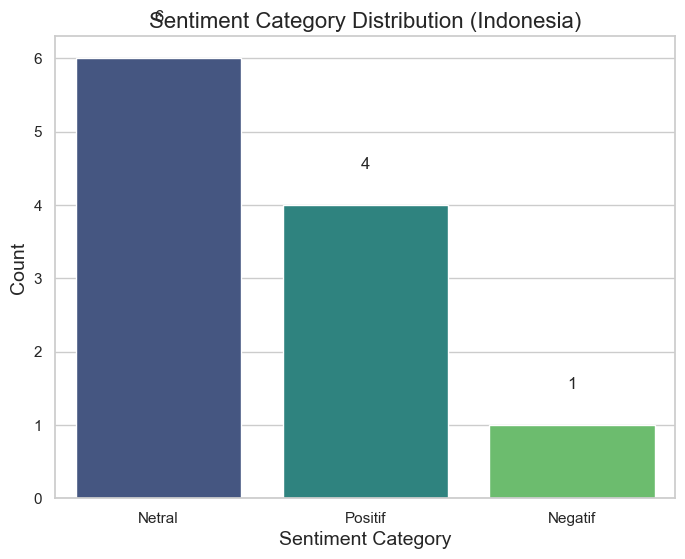

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the plot using seaborn
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts1.index, y=sentiment_counts1.values, palette='viridis')

# Add labels and title
plt.title('Sentiment Category Distribution (Indonesia)', fontsize=16)
plt.xlabel('Sentiment Category', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Display the values on top of the bars
for i in range(len(sentiment_counts1)):
    plt.text(i, sentiment_counts1.values[i] + 0.5, 
             sentiment_counts1.values[i], 
             ha='center', fontsize=12)

# Show the plot
plt.show()

#### Word Cloud (All and Based on Sentiment)

In [21]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


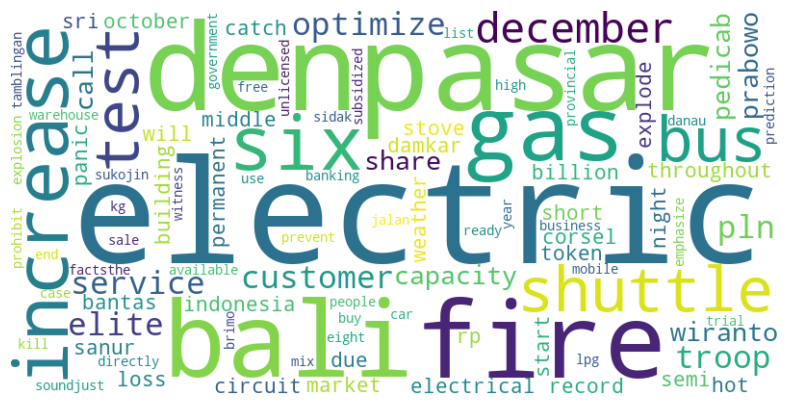

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all text from the 'Churn_Reason' column into a single string
text = " ".join(cleaned_title_translated for cleaned_title_translated in data_sentiment1['cleaned_title_translated'])

# Create a word cloud
wordcloud_inggris = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_inggris, interpolation='bilinear')
plt.axis('off')  # Remove axes
plt.show()

Based on Sentiment

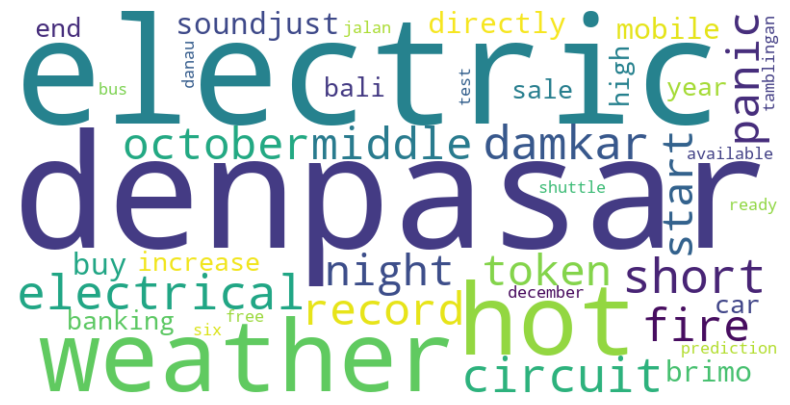

In [23]:
# Sentimen Positif
if data_sentiment1[data_sentiment1['sentiment_category_english'] == "Positif"].shape[0] != 0:
    data_sentiment1_positif = data_sentiment1[data_sentiment1['sentiment_category_english'] == "Positif"]

    text = " ".join(cleaned_title_translated for cleaned_title_translated in data_sentiment1_positif['cleaned_title_translated'])

    # Create a word cloud
    wordcloud_positif_inggris = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_positif_inggris, interpolation='bilinear')
    plt.axis('off')  # Remove axes
    plt.show()
else:
    print("Tidak ada sentimen positif pada berita")

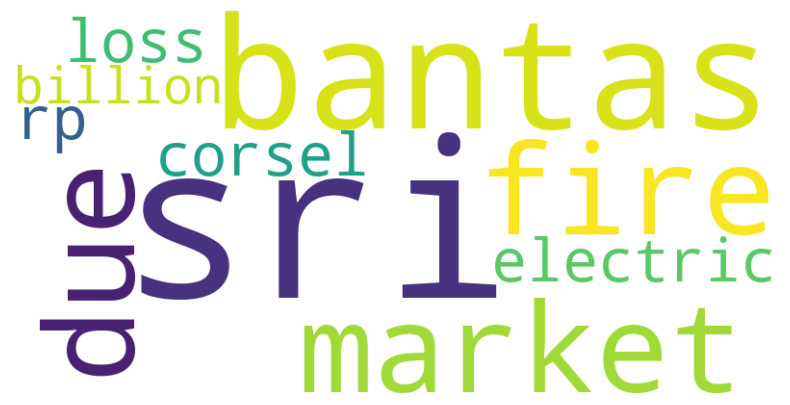

In [24]:
# Sentimen Negatif
if data_sentiment1[data_sentiment1['sentiment_category_english'] == "Negatif"].shape[0] != 0:
    data_sentiment1_negatif = data_sentiment1[data_sentiment1['sentiment_category_english'] == "Negatif"]

    text = " ".join(cleaned_title_translated for cleaned_title_translated in data_sentiment1_negatif['cleaned_title_translated'])

    # Create a word cloud
    wordcloud_negatif_inggris = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_negatif_inggris, interpolation='bilinear')
    plt.axis('off')  # Remove axes
    plt.show()
else: print("Tidak ada sentimen negatif pada berita")

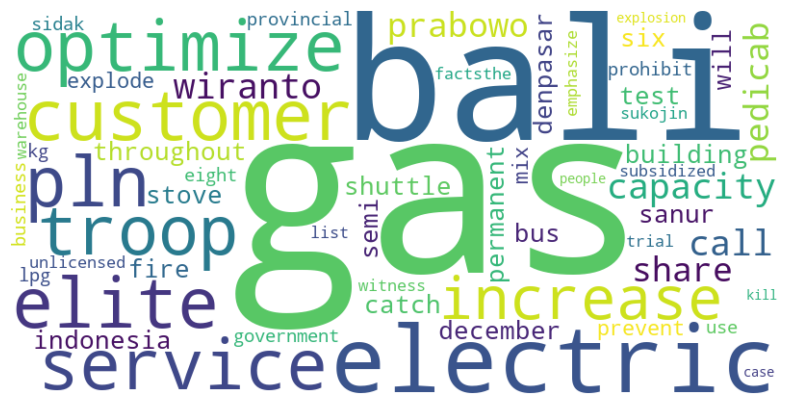

In [25]:
# Sentimen Netral
if data_sentiment1[data_sentiment1['sentiment_category_english'] == "Netral"].shape[0] != 0:
    data_sentiment1_netral = data_sentiment1[data_sentiment1['sentiment_category_english'] == "Netral"]

    text = " ".join(cleaned_title_translated for cleaned_title_translated in data_sentiment1_netral['cleaned_title_translated'])

    # Create a word cloud
    wordcloud_netral_inggris = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_netral_inggris, interpolation='bilinear')
    plt.axis('off')  # Remove axes
    plt.show()
else: print("Tidak ada sentimen netral pada berita")

### 2. VADER

#### Sentiment

In [54]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [55]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Define a function to get sentiment scores with VADER
def get_sentiment_vader(text):
    # VADER provides a compound score which ranges from -1 (negative) to 1 (positive)
    score = sia.polarity_scores(text)['compound']
    return score

# Apply VADER to get the sentiment scores
data_sentiment1['sentiment_score_english_vader'] = data_sentiment1['cleaned_title_translated'].apply(get_sentiment_vader)

# Categorize sentiment with only 2 categories
def categorize_sentiment(score):
    if score > 0.05:  # Threshold for positive sentiment
        return 'Positif'
    elif score < -0.05:  # Threshold for negative sentiment
        return 'Negatif'
    else:
        return 'Netral'  # Scores between -0.05 and 0.05 considered neutral

data_sentiment1['sentiment_category_english_vader'] = data_sentiment1['sentiment_score_english_vader'].apply(categorize_sentiment)

C:\Users\asus\AppData\Local\Temp\ipykernel_33372\17249303.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sentiment1['sentiment_score_english_vader'] = data_sentiment1['cleaned_title_translated'].apply(get_sentiment_vader)
C:\Users\asus\AppData\Local\Temp\ipykernel_33372\17249303.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sentiment1['sentiment_category_english_vader'] = data_sentiment1['sentiment_score_english_vader'].apply(categorize_sentiment)


In [56]:
data_sentiment1.head()

,keyword,title_translated,cleaned_title_translated,sentiment_score_english,sentiment_category_english,sentiment_score_english_vader,sentiment_category_english_vader
0,pln,"Optimize customer service in Bali, PLN elite t...",optimize customer service in bali pln elite tr...,0.000,Netral,0.6705,Positif
1,listrik,Wiranto Call Prabowo Share 500 Electric Pedica...,wiranto call prabowo share 500 electric pedica...,0.000,Netral,0.2960,Positif
2,listrik,Six shuttle electric buses will be tested in S...,six shuttle electric bus will be test in sanur...,0.000,Netral,0.0000,Netral
3,listrik,Sri Bantas Market Fire Due to Electric Corsels...,sri bantas market fire due to electric corsel ...,-0.125,Negatif,-0.5719,Negatif
4,gas,The semi -permanent building in Denpasar caugh...,the semi permanent building in denpasar catch ...,0.000,Netral,-0.3400,Negatif


In [57]:
sentiment_counts1_vader = data_sentiment1['sentiment_category_english_vader'].value_counts()
sentiment_counts1_vader

sentiment_category_english_vader
Negatif    5
Positif    4
Netral     2
Name: count, dtype: int64

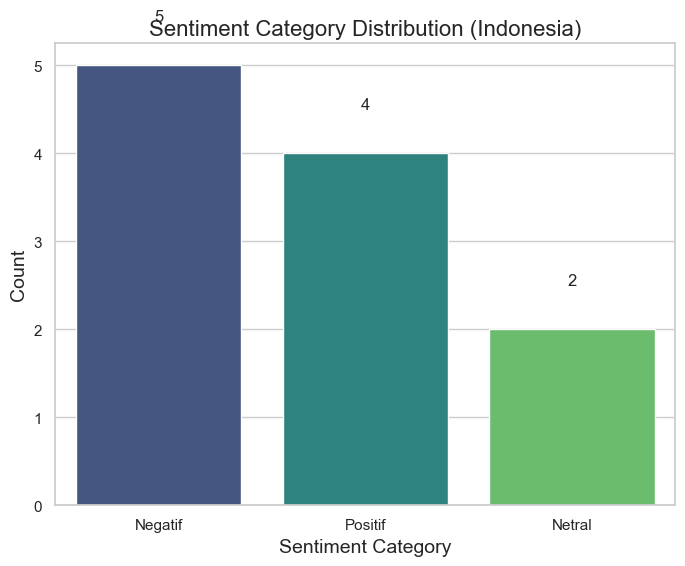

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the plot using seaborn
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts1_vader.index, y=sentiment_counts1_vader.values, palette='viridis')

# Add labels and title
plt.title('Sentiment Category Distribution (Indonesia)', fontsize=16)
plt.xlabel('Sentiment Category', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Display the values on top of the bars
for i in range(len(sentiment_counts1_vader)):
    plt.text(i, sentiment_counts1_vader.values[i] + 0.5, 
             sentiment_counts1_vader.values[i], 
             ha='center', fontsize=12)

# Show the plot
plt.show()

#### Word Cloud (Based on Sentiment Only)

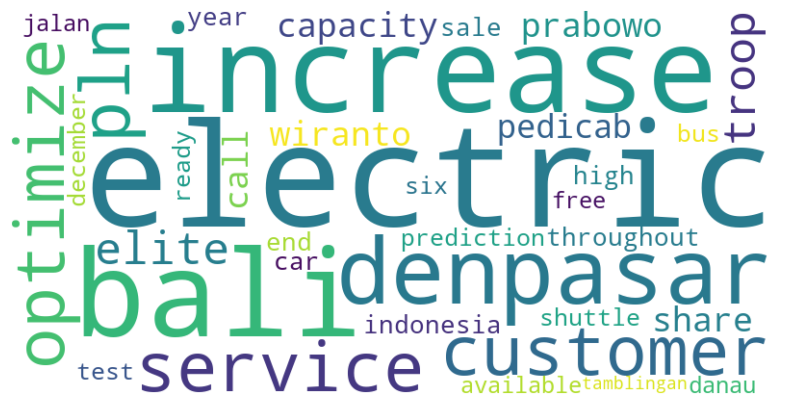

In [59]:
# Sentimen Positif
if data_sentiment1[data_sentiment1['sentiment_category_english_vader'] == "Positif"].shape[0] != 0:
    data_sentiment1_positif_vader = data_sentiment1[data_sentiment1['sentiment_category_english_vader'] == "Positif"]

    text = " ".join(cleaned_title_translated for cleaned_title_translated in data_sentiment1_positif_vader['cleaned_title_translated'])

    # Create a word cloud
    wordcloud_positif_inggris_vader = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_positif_inggris_vader, interpolation='bilinear')
    plt.axis('off')  # Remove axes
    plt.show()
else: print("Tidak ada sentimen positif pada berita")

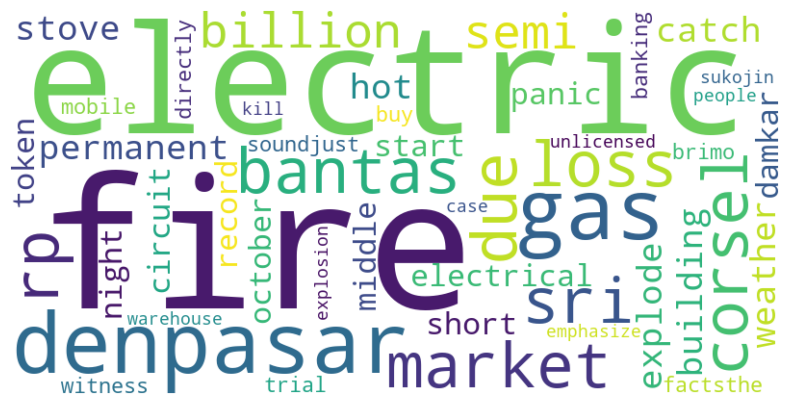

In [60]:
# Sentimen Negatif
if data_sentiment1[data_sentiment1['sentiment_category_english_vader'] == "Negatif"].shape[0] != 0:
    data_sentiment1_negatif_vader = data_sentiment1[data_sentiment1['sentiment_category_english_vader'] == "Negatif"]

    text = " ".join(cleaned_title_translated for cleaned_title_translated in data_sentiment1_negatif_vader['cleaned_title_translated'])

    # Create a word cloud
    wordcloud_negatif_inggris_vader = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_negatif_inggris_vader, interpolation='bilinear')
    plt.axis('off')  # Remove axes
    plt.show()
else: print("Tidak ada sentimen negatif pada berita")

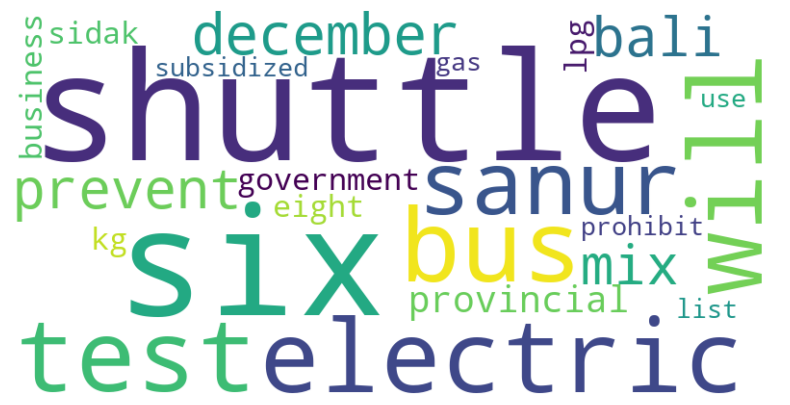

In [61]:
# Sentimen Netral
if data_sentiment1[data_sentiment1['sentiment_category_english_vader'] == "Netral"].shape[0] != 0:
    data_sentiment1_netral_vader = data_sentiment1[data_sentiment1['sentiment_category_english_vader'] == "Netral"]

    text = " ".join(cleaned_title_translated for cleaned_title_translated in data_sentiment1_netral_vader['cleaned_title_translated'])

    # Create a word cloud
    wordcloud_netral_inggris_vader = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_netral_inggris_vader, interpolation='bilinear')
    plt.axis('off')  # Remove axes
    plt.show()
else: print("Tidak ada sentimen netral pada berita")

### 3. IndoBERT

#### Sentiment

In [62]:
pip install transforms torch

Note: you may need to restart the kernel to use updated packages.


In [63]:
data_sentiment2 = data_ready[['keyword','title','cleaned_title','content']]
data_sentiment2

,keyword,title,cleaned_title,content
0,pln,"Optimalkan Layanan Pelanggan di Bali, Pasukan ...",optimal layan langgan di bal pasu elit pln tin...,"NEGARA, BALIPOST.com - Tim Pekerjaan Dalam Kea..."
1,listrik,Wiranto Sebut Prabowo Bagikan 500 Becak Listri...,wiranto sebut prabowo bagi becak listrik di se...,Penasihat Khusus Presiden Bidang Politik dan K...
2,listrik,Enam Bus Listrik Antar Jemput Bakal Diuji Coba...,enam bus listrik antar jemput bakal uji coba d...,Enam bus antar jemput (shuttle bus) listrik ba...
3,listrik,Kebakaran Pasar Sri Bantas Akibat Korsleting L...,bakar pasar sri bantas akibat korsleting listr...,Kebakaran Pasar Tradisional Sri Bantas di Banj...
4,gas,Bangunan Semi Permanen di Denpasar Terbakar ge...,bangun semi permanen di denpasar bakar gegara ...,Bangunan semi permanen seluas kurang lebih 2 a...
5,listrik,"Cuaca Panas hingga Korsleting Listrik, Damkar ...",cuaca panas hingga korsleting listrik damkar d...,Denpasar
6,listrik,Panik di Tengah Malam Token Listrik Mulai Buny...,panik di tengah malam token listrik mulai buny...,Ekonomi & Perbankan
7,listrik,Akhir Tahun Penjualan Mobil Listrik di Bali Me...,akhir tahun jual mobil listrik di bal tingkat ...,Otomotif
8,listrik,Enam Shuttle Bus Listrik Siap Uji Coba di Bula...,enam shuttle bus listrik siap uji coba di bula...,Denpasar
9,gas,"Cegah Pengoplosan, Pemprov Bali Sidak LPG 3 K...",cegah oplos pemprov bal sidak lpg kg delapan u...,Bali


In [64]:
from transformers import BertForSequenceClassification, BertTokenizer
import torch

# Load the saved model and tokenizer
model_load_path = "C:/Users/asus/OneDrive/BPS/Neraca/smsa_bpsbali_indobert_model"  # The path where the model is saved
tokenizer_load_path = "C:/Users/asus/OneDrive/BPS/Neraca/smsa_bpsbali_indobert_tokenizer"  # The path where the tokenizer is saved

# Load the model and tokenizer
model = BertForSequenceClassification.from_pretrained(model_load_path)
tokenizer = BertTokenizer.from_pretrained(tokenizer_load_path)

In [65]:
from torch.nn.functional import softmax  # Softmax function to convert logits to probabilities

# Initialize an empty list to collect predictions
sentiment_predict = []
probabilities = []

# Loop through the cleaned titles
for text in data_sentiment2['cleaned_title']:
    # Tokenize the input text
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=512)

    # Make prediction
    model.eval()  # Set model to evaluation mode
    with torch.no_grad():  # Disable gradients for inference
        outputs = model(**inputs)

    # Get the logits (raw scores)
    logits = outputs.logits
    
    # Apply softmax to convert logits to probabilities
    probs = softmax(logits, dim=-1)  # Softmax along the class dimension (last dimension)

    # Get the predicted class (index of max logit)
    predicted_class = logits.argmax(dim=-1).item()

    # Get the probability of the predicted class
    predicted_prob = probs[0, predicted_class].item()

    # Convert prediction to string label
    if predicted_class == 0:
        sentiment_label = "positif"
    elif predicted_class == 1:
        sentiment_label = "netral"
    else:
        sentiment_label = "negatif"

    # Append the sentiment label and its probability
    sentiment_predict.append(sentiment_label)
    probabilities.append(predicted_prob)

# After the loop, create the DataFrame
sentiment_predict_df = pd.DataFrame({
    'sentiment': sentiment_predict,
    'probability': probabilities
})

# Add it as a new column to the original DataFrame
data_sentiment2['sentiment_score_indonesia'] = sentiment_predict_df['probability']
data_sentiment2['sentiment_category_indonesia'] = sentiment_predict_df['sentiment']

# Optionally, you can print the DataFrame to check the results
data_sentiment2


C:\Users\asus\AppData\Local\Temp\ipykernel_33372\1096017218.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sentiment2['sentiment_score_indonesia'] = sentiment_predict_df['probability']
C:\Users\asus\AppData\Local\Temp\ipykernel_33372\1096017218.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sentiment2['sentiment_category_indonesia'] = sentiment_predict_df['sentiment']


,keyword,title,cleaned_title,content,sentiment_score_indonesia,sentiment_category_indonesia
0,pln,"Optimalkan Layanan Pelanggan di Bali, Pasukan ...",optimal layan langgan di bal pasu elit pln tin...,"NEGARA, BALIPOST.com - Tim Pekerjaan Dalam Kea...",0.618497,netral
1,listrik,Wiranto Sebut Prabowo Bagikan 500 Becak Listri...,wiranto sebut prabowo bagi becak listrik di se...,Penasihat Khusus Presiden Bidang Politik dan K...,0.996409,netral
2,listrik,Enam Bus Listrik Antar Jemput Bakal Diuji Coba...,enam bus listrik antar jemput bakal uji coba d...,Enam bus antar jemput (shuttle bus) listrik ba...,0.996713,netral
3,listrik,Kebakaran Pasar Sri Bantas Akibat Korsleting L...,bakar pasar sri bantas akibat korsleting listr...,Kebakaran Pasar Tradisional Sri Bantas di Banj...,0.984580,netral
4,gas,Bangunan Semi Permanen di Denpasar Terbakar ge...,bangun semi permanen di denpasar bakar gegara ...,Bangunan semi permanen seluas kurang lebih 2 a...,0.983709,netral
5,listrik,"Cuaca Panas hingga Korsleting Listrik, Damkar ...",cuaca panas hingga korsleting listrik damkar d...,Denpasar,0.942685,netral
6,listrik,Panik di Tengah Malam Token Listrik Mulai Buny...,panik di tengah malam token listrik mulai buny...,Ekonomi & Perbankan,0.571438,netral
7,listrik,Akhir Tahun Penjualan Mobil Listrik di Bali Me...,akhir tahun jual mobil listrik di bal tingkat ...,Otomotif,0.985641,netral
8,listrik,Enam Shuttle Bus Listrik Siap Uji Coba di Bula...,enam shuttle bus listrik siap uji coba di bula...,Denpasar,0.985276,netral
9,gas,"Cegah Pengoplosan, Pemprov Bali Sidak LPG 3 K...",cegah oplos pemprov bal sidak lpg kg delapan u...,Bali,0.997254,netral


In [66]:
sentiment_counts2 = data_sentiment2['sentiment_category_indonesia'].value_counts()
sentiment_counts2

sentiment_category_indonesia
netral    11
Name: count, dtype: int64

c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:645: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  g_vals = grouped_vals.get_group(g)


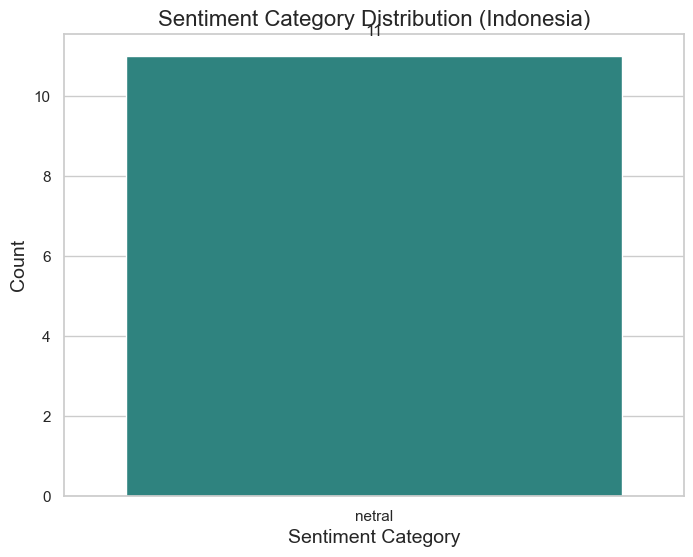

In [67]:
import seaborn as sns

# Set the style of the plot using seaborn
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts2.index, y=sentiment_counts2.values, palette='viridis')

# Add labels and title
plt.title('Sentiment Category Distribution (Indonesia)', fontsize=16)
plt.xlabel('Sentiment Category', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Display the values on top of the bars
for i in range(len(sentiment_counts2)):
    plt.text(i, sentiment_counts2.values[i] + 0.5, 
             sentiment_counts2.values[i], 
             ha='center', fontsize=12)

# Show the plot
plt.show()

#### Word Cloud (All and Based on Sentiment)

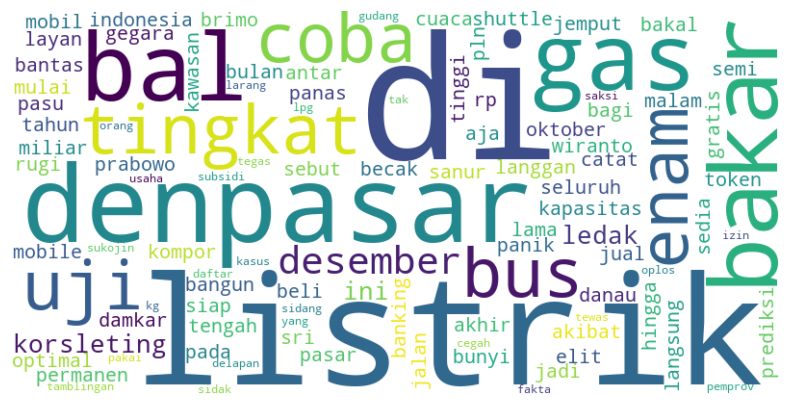

In [68]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all text from the 'Churn_Reason' column into a single string
text = " ".join(cleaned_title for cleaned_title in data_sentiment2['cleaned_title'])

# Create a word cloud
wordcloud_indonesia = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_indonesia, interpolation='bilinear')
plt.axis('off')  # Remove axes
plt.show()

Based on Sentiment

In [69]:
# Sentimen Positif
if data_sentiment2[data_sentiment2['sentiment_category_indonesia'] == "positif"].shape[0] != 0:
    data_sentiment2_positif = data_sentiment2[data_sentiment2['sentiment_category_indonesia'] == "positif"]

    text = " ".join(cleaned_title for cleaned_title in data_sentiment2_positif['cleaned_title'])

    # Create a word cloud
    wordcloud_positif_indonesia = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_positif_indonesia, interpolation='bilinear')
    plt.axis('off')  # Remove axes
    plt.show()
else: print("Tidak ada sentimen positif pada berita")

Tidak ada sentimen positif pada berita


In [70]:
# Sentimen Negatif
if data_sentiment2[data_sentiment2['sentiment_category_indonesia'] == "negatif"].shape[0] != 0:
    data_sentiment2_negatif = data_sentiment2[data_sentiment2['sentiment_category_indonesia'] == "negatif"]

    text = " ".join(cleaned_title for cleaned_title in data_sentiment2_negatif['cleaned_title'])

    # Create a word cloud
    wordcloud_negatif_indonesia = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_negatif_indonesia, interpolation='bilinear')
    plt.axis('off')  # Remove axes
    plt.show()
else: print("Tidak ada sentimen negatif pada berita")

Tidak ada sentimen negatif pada berita


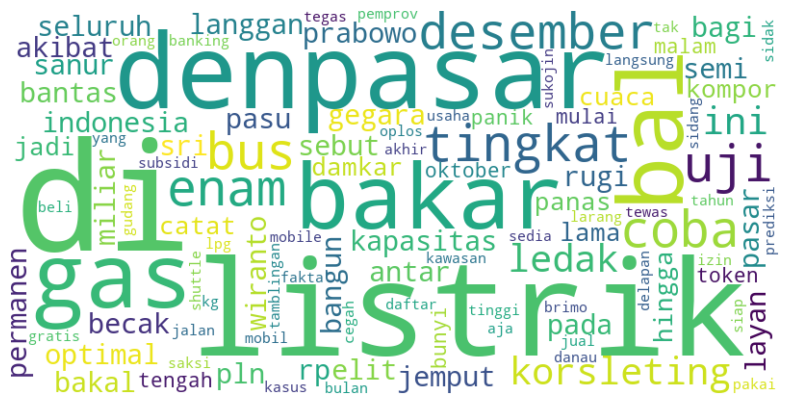

In [71]:
# Sentimen Netral
if data_sentiment2[data_sentiment2['sentiment_category_indonesia'] == "netral"].shape[0] != 0:
    data_sentiment2_netral = data_sentiment2[data_sentiment2['sentiment_category_indonesia'] == "netral"]

    text = " ".join(cleaned_title for cleaned_title in data_sentiment2_netral['cleaned_title'])

    # Create a word cloud
    wordcloud_netral_indonesia = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_netral_indonesia, interpolation='bilinear')
    plt.axis('off')  # Remove axes
    plt.show()
else: print("Tidak ada sentimen netral pada berita")

### Export Result

In [72]:
print(data_sentiment1.shape)
data_sentiment1.head()

(11, 7)


,keyword,title_translated,cleaned_title_translated,sentiment_score_english,sentiment_category_english,sentiment_score_english_vader,sentiment_category_english_vader
0,pln,"Optimize customer service in Bali, PLN elite t...",optimize customer service in bali pln elite tr...,0.000,Netral,0.6705,Positif
1,listrik,Wiranto Call Prabowo Share 500 Electric Pedica...,wiranto call prabowo share 500 electric pedica...,0.000,Netral,0.2960,Positif
2,listrik,Six shuttle electric buses will be tested in S...,six shuttle electric bus will be test in sanur...,0.000,Netral,0.0000,Netral
3,listrik,Sri Bantas Market Fire Due to Electric Corsels...,sri bantas market fire due to electric corsel ...,-0.125,Negatif,-0.5719,Negatif
4,gas,The semi -permanent building in Denpasar caugh...,the semi permanent building in denpasar catch ...,0.000,Netral,-0.3400,Negatif


In [73]:
print(data_sentiment2.shape)
data_sentiment2.head()

(11, 6)


,keyword,title,cleaned_title,content,sentiment_score_indonesia,sentiment_category_indonesia
0,pln,"Optimalkan Layanan Pelanggan di Bali, Pasukan ...",optimal layan langgan di bal pasu elit pln tin...,"NEGARA, BALIPOST.com - Tim Pekerjaan Dalam Kea...",0.618497,netral
1,listrik,Wiranto Sebut Prabowo Bagikan 500 Becak Listri...,wiranto sebut prabowo bagi becak listrik di se...,Penasihat Khusus Presiden Bidang Politik dan K...,0.996409,netral
2,listrik,Enam Bus Listrik Antar Jemput Bakal Diuji Coba...,enam bus listrik antar jemput bakal uji coba d...,Enam bus antar jemput (shuttle bus) listrik ba...,0.996713,netral
3,listrik,Kebakaran Pasar Sri Bantas Akibat Korsleting L...,bakar pasar sri bantas akibat korsleting listr...,Kebakaran Pasar Tradisional Sri Bantas di Banj...,0.984580,netral
4,gas,Bangunan Semi Permanen di Denpasar Terbakar ge...,bangun semi permanen di denpasar bakar gegara ...,Bangunan semi permanen seluas kurang lebih 2 a...,0.983709,netral


In [74]:
# Assigning columns individually
sentiment_result = data_sentiment2.copy()  # Copy data_sentiment2 to avoid modifying the original

# Assign columns from data_sentiment1 to sentiment_result
sentiment_result['title_translated'] = data_sentiment1['title_translated']
sentiment_result['cleaned_title_translated'] = data_sentiment1['cleaned_title_translated']
sentiment_result['sentiment_category_english'] = data_sentiment1['sentiment_category_english']
sentiment_result['sentiment_score_english'] = data_sentiment1['sentiment_score_english']
sentiment_result['sentiment_category_english_vader'] = data_sentiment1['sentiment_category_english_vader']
sentiment_result['sentiment_score_english_vader'] = data_sentiment1['sentiment_score_english_vader']

print(sentiment_result.shape)
sentiment_result.head()

(11, 12)


,keyword,title,cleaned_title,content,sentiment_score_indonesia,sentiment_category_indonesia,title_translated,cleaned_title_translated,sentiment_category_english,sentiment_score_english,sentiment_category_english_vader,sentiment_score_english_vader
0,pln,"Optimalkan Layanan Pelanggan di Bali, Pasukan ...",optimal layan langgan di bal pasu elit pln tin...,"NEGARA, BALIPOST.com - Tim Pekerjaan Dalam Kea...",0.618497,netral,"Optimize customer service in Bali, PLN elite t...",optimize customer service in bali pln elite tr...,Netral,0.000,Positif,0.6705
1,listrik,Wiranto Sebut Prabowo Bagikan 500 Becak Listri...,wiranto sebut prabowo bagi becak listrik di se...,Penasihat Khusus Presiden Bidang Politik dan K...,0.996409,netral,Wiranto Call Prabowo Share 500 Electric Pedica...,wiranto call prabowo share 500 electric pedica...,Netral,0.000,Positif,0.2960
2,listrik,Enam Bus Listrik Antar Jemput Bakal Diuji Coba...,enam bus listrik antar jemput bakal uji coba d...,Enam bus antar jemput (shuttle bus) listrik ba...,0.996713,netral,Six shuttle electric buses will be tested in S...,six shuttle electric bus will be test in sanur...,Netral,0.000,Netral,0.0000
3,listrik,Kebakaran Pasar Sri Bantas Akibat Korsleting L...,bakar pasar sri bantas akibat korsleting listr...,Kebakaran Pasar Tradisional Sri Bantas di Banj...,0.984580,netral,Sri Bantas Market Fire Due to Electric Corsels...,sri bantas market fire due to electric corsel ...,Negatif,-0.125,Negatif,-0.5719
4,gas,Bangunan Semi Permanen di Denpasar Terbakar ge...,bangun semi permanen di denpasar bakar gegara ...,Bangunan semi permanen seluas kurang lebih 2 a...,0.983709,netral,The semi -permanent building in Denpasar caugh...,the semi permanent building in denpasar catch ...,Netral,0.000,Negatif,-0.3400


In [75]:
sentiment_result.to_excel("C:/Users/asus/OneDrive/BPS/Neraca/sentimentresult_sektor4_triwulan4_bali.xlsx")